## Diccionario de Datos

### Descripción General de los Datos
El conjunto de datos `BD_creditos.csv` contiene información detallada sobre créditos otorgados. El objetivo es analizar estos datos para comprender las características de los préstamos y los perfiles de los clientes, lo que podría servir para evaluar el riesgo crediticio.

### Caracterización de los Datos

A continuación se detalla el tipo y la descripción de cada variable presente en el dataset:

| Variable | Tipo de Dato | Subtipo | Descripción | 
| :--- | :--- | :--- | :--- |
| **tipo_credito** | Categórico | Nominal | Modalidad o tipo del crédito otorgado. |
| **fecha_prestamo** | Fecha/Hora | Continuo | Fecha en la que se desembolsó el préstamo. |
| **capital_prestado** | Numérico | Continuo | Monto total del capital prestado al cliente. |
| **plazo_meses** | Numérico | Discreto | Número de meses acordado para pagar el crédito. |
| **edad_cliente** | Numérico | Discreto | Edad del cliente al momento de solicitar el crédito. |
| **tipo_laboral** | Categórico | Nominal | Condición laboral del cliente (ej. empleado, independiente). |
| **salario_cliente** | Numérico | Continuo | Ingreso salarial reportado por el cliente. |
| **total_otros_prestamos**| Numérico | Continuo | Suma de las deudas en otras entidades. |
| **cuota_pactada** | Numérico | Continuo | Valor de la cuota mensual que el cliente se comprometió a pagar. |
| **puntaje** | Numérico | Discreto | Calificación o puntaje de riesgo interno asignado por la entidad. |
| **puntaje_datacredito**| Numérico | Discreto | Puntaje crediticio del cliente según la central de riesgo DataCrédito. |
| **cant_creditosvigentes**| Numérico | Discreto | Número de créditos que el cliente tiene activos actualmente. |
| **huella_consulta** | Numérico | Discreto | Cantidad de veces que el historial crediticio del cliente ha sido consultado. |
| **saldo_mora** | Numérico | Continuo | Monto de la deuda que se encuentra en mora. |
| **saldo_total** | Numérico | Continuo | Deuda total del cliente, incluyendo capital e intereses. |
| **saldo_principal** | Numérico | Continuo | Saldo pendiente correspondiente solo al capital del préstamo. |
| **saldo_mora_codeudor** | Numérico | Continuo | Monto de la deuda en mora correspondiente al codeudor. |
| **creditos_sectorFinanciero**| Numérico | Discreto | Número de créditos que el cliente tiene en el sector financiero. |
| **creditos_sectorCooperativo**| Numérico | Discreto | Número de créditos que el cliente tiene en el sector cooperativo. |
| **creditos_sectorReal** | Numérico | Discreto | Número de créditos con empresas del sector real (ej. almacenes). |
| **promedio_ingresos_datacredito**| Numérico | Continuo | Ingreso promedio del cliente reportado en DataCrédito. |
| **tendencia_ingresos** | Categórico | Ordinal | Tendencia de los ingresos del cliente (ej. aumenta, disminuye, estable). |
| **Pago_atiempo** | Categórico | Nominal (Dicotómico) | Variable objetivo. Indica si el cliente ha pagado a tiempo ('SI', 'NO'). |

In [49]:
# Definición del problema en términos de ML
problema_ml = {
    'tipo': 'Clasificación Binaria',
    'variable_objetivo': 'Pago_atiempo',
    'clases': ['No paga a tiempo (0)', 'Paga a tiempo (1)'],
    'enfoque': 'Aprendizaje Supervisado',
    'metricas_clave': ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
}

print("=== DEFINICIÓN DEL PROBLEMA DE ML ===")
for key, value in problema_ml.items():
    print(f"{key}: {value}")

=== DEFINICIÓN DEL PROBLEMA DE ML ===
tipo: Clasificación Binaria
variable_objetivo: Pago_atiempo
clases: ['No paga a tiempo (0)', 'Paga a tiempo (1)']
enfoque: Aprendizaje Supervisado
metricas_clave: ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
%matplotlib inline

## 1. Carga de Datos

In [51]:
df = pd.read_csv('BD_creditos.csv')
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de clientes: {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")  # -1 por la variable objetivo
print(f"\nPrimeras 5 filas del dataset:")
df.head()

=== INFORMACIÓN DEL DATASET ===
Dimensiones del dataset: (10763, 23)
Número de clientes: 10763
Número de características: 22

Primeras 5 filas del dataset:


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,12/21/2024 11:31,3692160,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,4/22/2025 9:47,840000,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,1/8/2026 12:22,5974028,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,8/4/2025 12:04,1671240,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,4/26/2025 11:24,2781636,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [52]:
# Información general del dataset
print("\n=== INFORMACIÓN GENERAL DEL DATASET ===")
df.info()


=== INFORMACIÓN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo_credito                   10763 non-null  int64  
 1   fecha_prestamo                 10763 non-null  object 
 2   capital_prestado               10763 non-null  int64  
 3   plazo_meses                    10763 non-null  int64  
 4   edad_cliente                   10763 non-null  int64  
 5   tipo_laboral                   10763 non-null  object 
 6   salario_cliente                10763 non-null  int64  
 7   total_otros_prestamos          10763 non-null  int64  
 8   cuota_pactada                  10763 non-null  int64  
 9   puntaje                        10763 non-null  float64
 10  puntaje_datacredito            10757 non-null  float64
 11  cant_creditosvigentes          10763 non-null  int64  
 12  huell

## 2.2 Eliminación de Variables Irrelevantes
### Análisis de Relevancia para Predicción de Pago a Tiempo
Para el problema de predecir si un cliente paga a tiempo, necesitamos identificar qué variables son irrelevantes o podrían introducir ruido al modelo.

In [53]:
# Análisis de variables irrelevantes para predicción de pago a tiempo
print("=== ANÁLISIS DE VARIABLES IRRELEVANTES ===")

# 1. Análisis de correlación con la variable objetivo
correlations_with_target = df.select_dtypes(include=[np.number]).corr()['Pago_atiempo'].abs().sort_values(ascending=False)
print("\nCorrelaciones con variable objetivo (Pago_atiempo):")
print(correlations_with_target)

# 2. Identificar variables con varianza muy baja o cero
print("\n=== ANÁLISIS DE VARIANZA ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if col != 'Pago_atiempo':
        variance = df[col].var()
        unique_values = df[col].nunique()
        print(f"{col}: Varianza={variance:.4f}, Valores únicos={unique_values}")

# 3. Variables que podrían ser irrelevantes o problemáticas
variables_irrelevantes = {
    'fecha_prestamo': 'Fecha específica no es predictiva por sí misma (usar características derivadas)',
    'saldo_mora': 'Puede causar data leakage - refleja comportamiento de pago ya ocurrido',
    'saldo_total': 'Puede causar data leakage - información posterior al evento',
    'saldo_principal': 'Puede causar data leakage - información posterior al evento',
    'saldo_mora_codeudor': 'Puede causar data leakage - información posterior al evento'
}

print("\n=== VARIABLES POTENCIALMENTE IRRELEVANTES O PROBLEMÁTICAS ===")
for var, razon in variables_irrelevantes.items():
    if var in df.columns:
        print(f"❌ {var}: {razon}")

# 4. Variables con muchos valores faltantes
print("\n=== VARIABLES CON MUCHOS VALORES FALTANTES ===")
missing_threshold = 0.3  # 30% de valores faltantes
for col in df.columns:
    missing_pct = df[col].isnull().sum() / len(df)
    if missing_pct > missing_threshold:
        print(f"⚠️ {col}: {missing_pct:.2%} valores faltantes")

# 5. Variables identificadores (no predictivas)
identificadores = ['CustomerID'] if 'CustomerID' in df.columns else []
if identificadores:
    print(f"\n=== VARIABLES IDENTIFICADORAS (NO PREDICTIVAS) ===")
    for var in identificadores:
        print(f"🔍 {var}: Variable identificadora, no aporta valor predictivo")

=== ANÁLISIS DE VARIABLES IRRELEVANTES ===

Correlaciones con variable objetivo (Pago_atiempo):
Pago_atiempo                     1.000000
puntaje                          0.923134
huella_consulta                  0.073737
saldo_mora                       0.073458
puntaje_datacredito              0.067882
plazo_meses                      0.063105
capital_prestado                 0.040624
promedio_ingresos_datacredito    0.039867
edad_cliente                     0.032252
creditos_sectorReal              0.023306
creditos_sectorFinanciero        0.021390
creditos_sectorCooperativo       0.021267
saldo_total                      0.014364
cuota_pactada                    0.011814
saldo_principal                  0.011473
total_otros_prestamos            0.010041
cant_creditosvigentes            0.008829
salario_cliente                  0.003981
saldo_mora_codeudor              0.002631
tipo_credito                     0.000951
Name: Pago_atiempo, dtype: float64

=== ANÁLISIS DE VARIANZA ===

In [54]:
# Eliminar variables irrelevantes identificadas
print("=== ELIMINACIÓN DE VARIABLES IRRELEVANTES ===")

# Variables a eliminar basadas en el análisis
variables_a_eliminar = [
    'fecha_prestamo',  # Fecha específica - usaremos características derivadas
    'saldo_mora',      # Data leakage potencial
    'saldo_total',     # Data leakage potencial  
    'saldo_principal', # Data leakage potencial
    'saldo_mora_codeudor'  # Data leakage potencial
]

# Verificar que las variables existen antes de eliminar
variables_existentes = [var for var in variables_a_eliminar if var in df.columns]
variables_no_encontradas = [var for var in variables_a_eliminar if var not in df.columns]

print(f"Variables a eliminar encontradas: {variables_existentes}")
if variables_no_encontradas:
    print(f"Variables no encontradas en el dataset: {variables_no_encontradas}")

# Crear dataset sin variables irrelevantes
df_clean = df.drop(columns=variables_existentes)

print(f"\nDimensiones originales: {df.shape}")
print(f"Dimensiones después de eliminar variables irrelevantes: {df_clean.shape}")
print(f"Variables eliminadas: {len(variables_existentes)}")

# Mostrar las variables que quedan
print(f"\nVariables restantes ({df_clean.shape[1]}):")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. {col}")

=== ELIMINACIÓN DE VARIABLES IRRELEVANTES ===
Variables a eliminar encontradas: ['fecha_prestamo', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor']

Dimensiones originales: (10763, 23)
Dimensiones después de eliminar variables irrelevantes: (10763, 18)
Variables eliminadas: 5

Variables restantes (18):
 1. tipo_credito
 2. capital_prestado
 3. plazo_meses
 4. edad_cliente
 5. tipo_laboral
 6. salario_cliente
 7. total_otros_prestamos
 8. cuota_pactada
 9. puntaje
10. puntaje_datacredito
11. cant_creditosvigentes
12. huella_consulta
13. creditos_sectorFinanciero
14. creditos_sectorCooperativo
15. creditos_sectorReal
16. promedio_ingresos_datacredito
17. tendencia_ingresos
18. Pago_atiempo


In [55]:
# Calcular valores nulos y su porcentaje
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame para mostrar los resultados
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Nulos': missing_values.values,
    'Porcentaje (%)': missing_percentage.values
})

# Mostrar solo las columnas que tienen valores nulos
print("REVISIÓN DE VALORES NULOS")
display(missing_df[missing_df['Valores Nulos'] > 0].sort_values(by='Porcentaje (%)', ascending=False))

if missing_df['Valores Nulos'].sum() == 0:
    print("\n✅ No se encontraron valores nulos en el dataset.")

REVISIÓN DE VALORES NULOS


,Columna,Valores Nulos,Porcentaje (%)
21,tendencia_ingresos,2932,27.241475
20,promedio_ingresos_datacredito,2930,27.222893
16,saldo_mora_codeudor,590,5.481743
15,saldo_principal,405,3.762891
13,saldo_mora,156,1.449410
14,saldo_total,156,1.449410
10,puntaje_datacredito,6,0.055747


### Revisión de Nulos
A continuación, se realiza un análisis cuantitativo para identificar la cantidad y el porcentaje de valores nulos en cada columna del dataset. Esto es fundamental para decidir las estrategias de limpieza y preprocesamiento.

In [56]:
print("Primeras 5 filas:")
display(df.head())
print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

Primeras 5 filas:


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,12/21/2024 11:31,3692160,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,4/22/2025 9:47,840000,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,1/8/2026 12:22,5974028,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,8/4/2025 12:04,1671240,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,4/26/2025 11:24,2781636,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1



Estadísticas descriptivas:


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,10763,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,...,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,7831,10763.000000
unique,NaN,10444,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN
top,NaN,11/28/2024 7:46,NaN,NaN,NaN,Empleado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creciente,NaN
freq,NaN,4,NaN,NaN,NaN,6754,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5294,NaN
mean,5.411131,NaN,2.434315e+06,10.575583,43.948620,NaN,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,...,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,NaN,0.952523
std,2.338279,NaN,1.909643e+06,6.632082,15.060877,NaN,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,...,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,NaN,0.212668
min,4.000000,NaN,3.600000e+05,2.000000,19.000000,NaN,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000
25%,4.000000,NaN,1.224831e+06,6.000000,33.000000,NaN,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,...,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,NaN,1.000000
50%,4.000000,NaN,1.921920e+06,10.000000,42.000000,NaN,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,...,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,NaN,1.000000
75%,9.000000,NaN,3.084840e+06,12.000000,53.000000,NaN,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,...,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,NaN,1.000000


## 2.3 Conversión de Tipos de Datos y Corrección

### Objetivo
Convertir cada variable a su tipo de dato correcto (numéricos, categóricos, booleanos, fechas) y corregir inconsistencias para asegurar uniformidad en los datos.

In [57]:
# Análisis de tipos de datos actuales
print("=== ANÁLISIS DE TIPOS DE DATOS ACTUALES ===")
print("\nTipos de datos en el dataset limpio:")
print(df_clean.dtypes)

print("\n=== IDENTIFICACIÓN DE PROBLEMAS DE TIPOS ===")

# 1. Verificar si hay variables numéricas almacenadas como objeto
print("\nVariables que podrían necesitar conversión:")
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        # Verificar si contiene solo números
        sample_values = df_clean[col].dropna().head(10)
        print(f"\n{col} (object):")
        print(f"  Valores ejemplo: {list(sample_values)}")
        print(f"  Valores únicos: {df_clean[col].nunique()}")
        
        # Verificar si se puede convertir a numérico
        try:
            pd.to_numeric(df_clean[col], errors='raise')
            print(f"  ✅ Puede convertirse a numérico")
        except:
            print(f"  ❌ No puede convertirse a numérico - mantener como categórico")

# 2. Verificar variables que deberían ser categóricas
print("\n=== VARIABLES QUE DEBERÍAN SER CATEGÓRICAS ===")
categorical_candidates = []
for col in df_clean.select_dtypes(include=[np.number]).columns:
    unique_values = df_clean[col].nunique()
    if unique_values <= 10 and col != 'Pago_atiempo':  # Excluir variable objetivo
        print(f"{col}: {unique_values} valores únicos - Candidato a categórico")
        print(f"  Valores: {sorted(df_clean[col].unique())}")
        categorical_candidates.append(col)

=== ANÁLISIS DE TIPOS DE DATOS ACTUALES ===

Tipos de datos en el dataset limpio:
tipo_credito                       int64
capital_prestado                   int64
plazo_meses                        int64
edad_cliente                       int64
tipo_laboral                      object
salario_cliente                    int64
total_otros_prestamos              int64
cuota_pactada                      int64
puntaje                          float64
puntaje_datacredito              float64
cant_creditosvigentes              int64
huella_consulta                    int64
creditos_sectorFinanciero          int64
creditos_sectorCooperativo         int64
creditos_sectorReal                int64
promedio_ingresos_datacredito    float64
tendencia_ingresos                object
Pago_atiempo                       int64
dtype: object

=== IDENTIFICACIÓN DE PROBLEMAS DE TIPOS ===

Variables que podrían necesitar conversión:

tipo_laboral (object):
  Valores ejemplo: ['Independiente', 'Empleado', 'I

In [58]:
# Realizar conversiones de tipos de datos
print("=== CONVERSIÓN DE TIPOS DE DATOS ===")

# Crear copia para conversiones
df_typed = df_clean.copy()

# 1. Convertir variables categóricas identificadas
categorical_variables = {
    'tipo_credito': 'category',
    'tipo_laboral': 'category', 
    'tendencia_ingresos': 'category'
}

print("\n1. Convirtiendo variables categóricas:")
for col, new_type in categorical_variables.items():
    if col in df_typed.columns:
        old_type = df_typed[col].dtype
        df_typed[col] = df_typed[col].astype(new_type)
        print(f"   ✅ {col}: {old_type} → {new_type}")

# 2. Convertir variable objetivo a categórico para mayor claridad
print("\n2. Convirtiendo variable objetivo:")
df_typed['Pago_atiempo'] = df_typed['Pago_atiempo'].astype('category')
print(f"   ✅ Pago_atiempo: int64 → category")

# 3. Asegurar que variables numéricas estén en el tipo correcto
print("\n3. Verificando variables numéricas:")
numeric_columns = [
    'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente',
    'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito',
    'cant_creditosvigentes', 'huella_consulta', 'creditos_sectorFinanciero',
    'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito'
]

for col in numeric_columns:
    if col in df_typed.columns:
        if df_typed[col].dtype == 'object':
            try:
                df_typed[col] = pd.to_numeric(df_typed[col], errors='coerce')
                print(f"   ✅ {col}: Convertido a numérico")
            except:
                print(f"   ❌ {col}: No se pudo convertir a numérico")
        
        # Convertir enteros apropiados
        if col in ['plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 
                   'cuota_pactada', 'cant_creditosvigentes', 'huella_consulta',
                   'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal']:
            if df_typed[col].dtype == 'float64' and df_typed[col].notna().all():
                df_typed[col] = df_typed[col].astype('int64')
                print(f"   ✅ {col}: Convertido a int64")

print("\n=== RESUMEN DE CONVERSIONES ===")
print("\nTipos de datos después de conversiones:")
print(df_typed.dtypes)

print(f"\nDimensiones finales: {df_typed.shape}")
print(f"Variables numéricas: {len(df_typed.select_dtypes(include=[np.number]).columns)}")
print(f"Variables categóricas: {len(df_typed.select_dtypes(include=['category', 'object']).columns)}")

=== CONVERSIÓN DE TIPOS DE DATOS ===

1. Convirtiendo variables categóricas:
   ✅ tipo_credito: int64 → category
   ✅ tipo_laboral: object → category
   ✅ tendencia_ingresos: object → category

2. Convirtiendo variable objetivo:
   ✅ Pago_atiempo: int64 → category

3. Verificando variables numéricas:

=== RESUMEN DE CONVERSIONES ===

Tipos de datos después de conversiones:
tipo_credito                     category
capital_prestado                    int64
plazo_meses                         int64
edad_cliente                        int64
tipo_laboral                     category
salario_cliente                     int64
total_otros_prestamos               int64
cuota_pactada                       int64
puntaje                           float64
puntaje_datacredito               float64
cant_creditosvigentes               int64
huella_consulta                     int64
creditos_sectorFinanciero           int64
creditos_sectorCooperativo          int64
creditos_sectorReal                 

In [59]:
# Validación y corrección de datos inconsistentes
print("=== VALIDACIÓN Y CORRECCIÓN DE DATOS ===")

# 1. Verificar rangos lógicos de variables
print("\n1. Verificando rangos lógicos:")

# Edad del cliente (debe estar entre 18 y 100 años aprox.)
if 'edad_cliente' in df_typed.columns:
    edad_min, edad_max = df_typed['edad_cliente'].min(), df_typed['edad_cliente'].max()
    print(f"   Edad cliente: rango {edad_min} - {edad_max}")
    if edad_min < 18 or edad_max > 100:
        print(f"   ⚠️ Valores de edad fuera del rango esperado")
    else:
        print(f"   ✅ Rangos de edad son lógicos")

# Puntajes (normalmente entre 0 y 1000)
if 'puntaje' in df_typed.columns:
    puntaje_min, puntaje_max = df_typed['puntaje'].min(), df_typed['puntaje'].max()
    print(f"   Puntaje: rango {puntaje_min} - {puntaje_max}")

# 2. Verificar consistencia en variables categóricas
print("\n2. Verificando consistencia en variables categóricas:")
categorical_cols = df_typed.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    if col != 'Pago_atiempo':
        unique_vals = df_typed[col].unique()
        print(f"   {col}: {len(unique_vals)} categorías únicas")
        if len(unique_vals) <= 10:
            print(f"      Valores: {list(unique_vals)}")

# 3. Manejo de valores faltantes
print("\n3. Tratamiento de valores faltantes:")
missing_summary = df_typed.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

if len(missing_cols) > 0:
    print("   Variables con valores faltantes:")
    for col, count in missing_cols.items():
        pct = (count / len(df_typed)) * 100
        print(f"   {col}: {count} valores faltantes ({pct:.2f}%)")
        
        # Estrategia de imputación básica
        if df_typed[col].dtype in ['int64', 'float64']:
            # Para numéricas, usar mediana
            median_val = df_typed[col].median()
            df_typed[col].fillna(median_val, inplace=True)
            print(f"      ✅ Imputado con mediana: {median_val}")
        elif df_typed[col].dtype in ['category', 'object']:
            # Para categóricas, usar moda
            mode_val = df_typed[col].mode()[0] if len(df_typed[col].mode()) > 0 else 'Unknown'
            df_typed[col].fillna(mode_val, inplace=True)
            print(f"      ✅ Imputado con moda: {mode_val}")
else:
    print("   ✅ No hay valores faltantes")

# 4. Resumen final del dataset procesado
print("\n=== RESUMEN FINAL DEL DATASET PROCESADO ===")
print(f"Dimensiones: {df_typed.shape}")
print(f"Variables eliminadas: {df.shape[1] - df_typed.shape[1]}")
print(f"Total de valores faltantes: {df_typed.isnull().sum().sum()}")

print("\nTipos de datos finales:")
type_summary = df_typed.dtypes.value_counts()
for dtype, count in type_summary.items():
    print(f"  {dtype}: {count} variables")

# Guardar dataset procesado
print("\n✅ Dataset procesado y listo para modelado")
print("Variables disponibles para el modelo:")
feature_cols = [col for col in df_typed.columns if col != 'Pago_atiempo']
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col} ({df_typed[col].dtype})")

=== VALIDACIÓN Y CORRECCIÓN DE DATOS ===

1. Verificando rangos lógicos:
   Edad cliente: rango 19 - 123
   ⚠️ Valores de edad fuera del rango esperado
   Puntaje: rango -38.00999 - 95.227787

2. Verificando consistencia en variables categóricas:
   tipo_credito: 6 categorías únicas
      Valores: [7, 4, 9, 10, 6, 68]
   tipo_laboral: 2 categorías únicas
      Valores: ['Independiente', 'Empleado']
   tendencia_ingresos: 47 categorías únicas

3. Tratamiento de valores faltantes:
   Variables con valores faltantes:
   puntaje_datacredito: 6 valores faltantes (0.06%)
      ✅ Imputado con mediana: 791.0
   promedio_ingresos_datacredito: 2930 valores faltantes (27.22%)
      ✅ Imputado con mediana: 1204496.0
   tendencia_ingresos: 2932 valores faltantes (27.24%)
      ✅ Imputado con moda: Creciente

=== RESUMEN FINAL DEL DATASET PROCESADO ===
Dimensiones: (10763, 18)
Variables eliminadas: 5
Total de valores faltantes: 0

Tipos de datos finales:
  int64: 11 variables
  float64: 3 variables


## 3. Exploración de datos y descripción (EDA)
### 3.1 Análisis univariable.

In [60]:
# Análisis univariable después del ajuste de tipos de datos
print("=== ANÁLISIS UNIVARIABLE - DESCRIPCIÓN ESTADÍSTICA ===")
print("\nUsando el dataset con tipos de datos corregidos (df_typed)")

# 1. Descripción general del dataset procesado
print("\n1. DESCRIPCIÓN GENERAL DEL DATASET PROCESADO")
print("="*50)
print(df_typed.describe(include='all'))

# 2. Análisis detallado por tipo de variable
print("\n\n2. ANÁLISIS VARIABLES NUMÉRICAS")
print("="*50)

# Obtener variables numéricas
numeric_vars = df_typed.select_dtypes(include=[np.number]).columns.tolist()
# Excluir variable objetivo para análisis independiente
numeric_vars = [col for col in numeric_vars if col != 'Pago_atiempo']

print(f"Variables numéricas a analizar: {numeric_vars}")

# Estadísticas descriptivas detalladas para variables numéricas
for var in numeric_vars:
    print(f"\n--- {var.upper()} ---")
    print(f"Tendencia Central:")
    print(f"  Media: {df_typed[var].mean():.2f}")
    print(f"  Mediana: {df_typed[var].median():.2f}")
    print(f"  Moda: {df_typed[var].mode().iloc[0] if len(df_typed[var].mode()) > 0 else 'N/A'}")
    print(f"  Mínimo: {df_typed[var].min():.2f}")
    print(f"  Máximo: {df_typed[var].max():.2f}")
    
    print(f"Medidas de Dispersión:")
    print(f"  Rango: {df_typed[var].max() - df_typed[var].min():.2f}")
    print(f"  Cuartil 1 (Q1): {df_typed[var].quantile(0.25):.2f}")
    print(f"  Cuartil 3 (Q3): {df_typed[var].quantile(0.75):.2f}")
    print(f"  Rango Intercuartílico (IQR): {df_typed[var].quantile(0.75) - df_typed[var].quantile(0.25):.2f}")
    print(f"  Varianza: {df_typed[var].var():.2f}")
    print(f"  Desviación Estándar: {df_typed[var].std():.2f}")
    print(f"  Coeficiente de Variación: {(df_typed[var].std()/df_typed[var].mean())*100:.2f}%")
    
    # Análisis de asimetría y curtosis
    from scipy import stats
    print(f"Forma de la Distribución:")
    print(f"  Asimetría (Skewness): {stats.skew(df_typed[var].dropna()):.2f}")
    print(f"  Curtosis (Kurtosis): {stats.kurtosis(df_typed[var].dropna()):.2f}")
    
print("\n\n3. ANÁLISIS VARIABLES CATEGÓRICAS")
print("="*50)

# Obtener variables categóricas
categorical_vars = df_typed.select_dtypes(include=['category', 'object']).columns.tolist()
# Excluir variable objetivo para análisis independiente
categorical_vars = [col for col in categorical_vars if col != 'Pago_atiempo']

print(f"Variables categóricas a analizar: {categorical_vars}")

for var in categorical_vars:
    print(f"\n--- {var.upper()} ---")
    value_counts = df_typed[var].value_counts()
    value_percentages = df_typed[var].value_counts(normalize=True) * 100
    
    print(f"Distribución de frecuencias:")
    for idx, (category, count) in enumerate(value_counts.items()):
        percentage = value_percentages.iloc[idx]
        print(f"  {category}: {count} ({percentage:.1f}%)")
    
    print(f"Estadísticas:")
    print(f"  Categorías únicas: {df_typed[var].nunique()}")
    print(f"  Categoría más frecuente: {df_typed[var].mode().iloc[0]}")
    print(f"  Frecuencia de la moda: {value_counts.iloc[0]} ({value_percentages.iloc[0]:.1f}%)")

print("\n\n4. ANÁLISIS VARIABLE OBJETIVO")
print("="*50)
print("--- PAGO_ATIEMPO ---")
target_counts = df_typed['Pago_atiempo'].value_counts()
target_percentages = df_typed['Pago_atiempo'].value_counts(normalize=True) * 100

print("Distribución de la variable objetivo:")
for category, count in target_counts.items():
    percentage = target_percentages[category]
    print(f"  {category}: {count} ({percentage:.1f}%)")

print(f"Balance de clases: {target_counts.min()}/{target_counts.max()} = {target_counts.min()/target_counts.max():.2f}")
if target_percentages.min() < 40:
    print("⚠️ Dataset desbalanceado - considerar técnicas de balanceo")

=== ANÁLISIS UNIVARIABLE - DESCRIPCIÓN ESTADÍSTICA ===

Usando el dataset con tipos de datos corregidos (df_typed)

1. DESCRIPCIÓN GENERAL DEL DATASET PROCESADO
        tipo_credito  capital_prestado   plazo_meses  edad_cliente  \
count        10763.0      1.076300e+04  10763.000000  10763.000000   
unique           6.0               NaN           NaN           NaN   
top              4.0               NaN           NaN           NaN   
freq          7747.0               NaN           NaN           NaN   
mean             NaN      2.434315e+06     10.575583     43.948620   
std              NaN      1.909643e+06      6.632082     15.060877   
min              NaN      3.600000e+05      2.000000     19.000000   
25%              NaN      1.224831e+06      6.000000     33.000000   
50%              NaN      1.921920e+06     10.000000     42.000000   
75%              NaN      3.084840e+06     12.000000     53.000000   
max              NaN      4.144415e+07     90.000000    123.000000   

=== VISUALIZACIONES VARIABLES NUMÉRICAS ===

1. HISTOGRAMAS DE DISTRIBUCIÓN


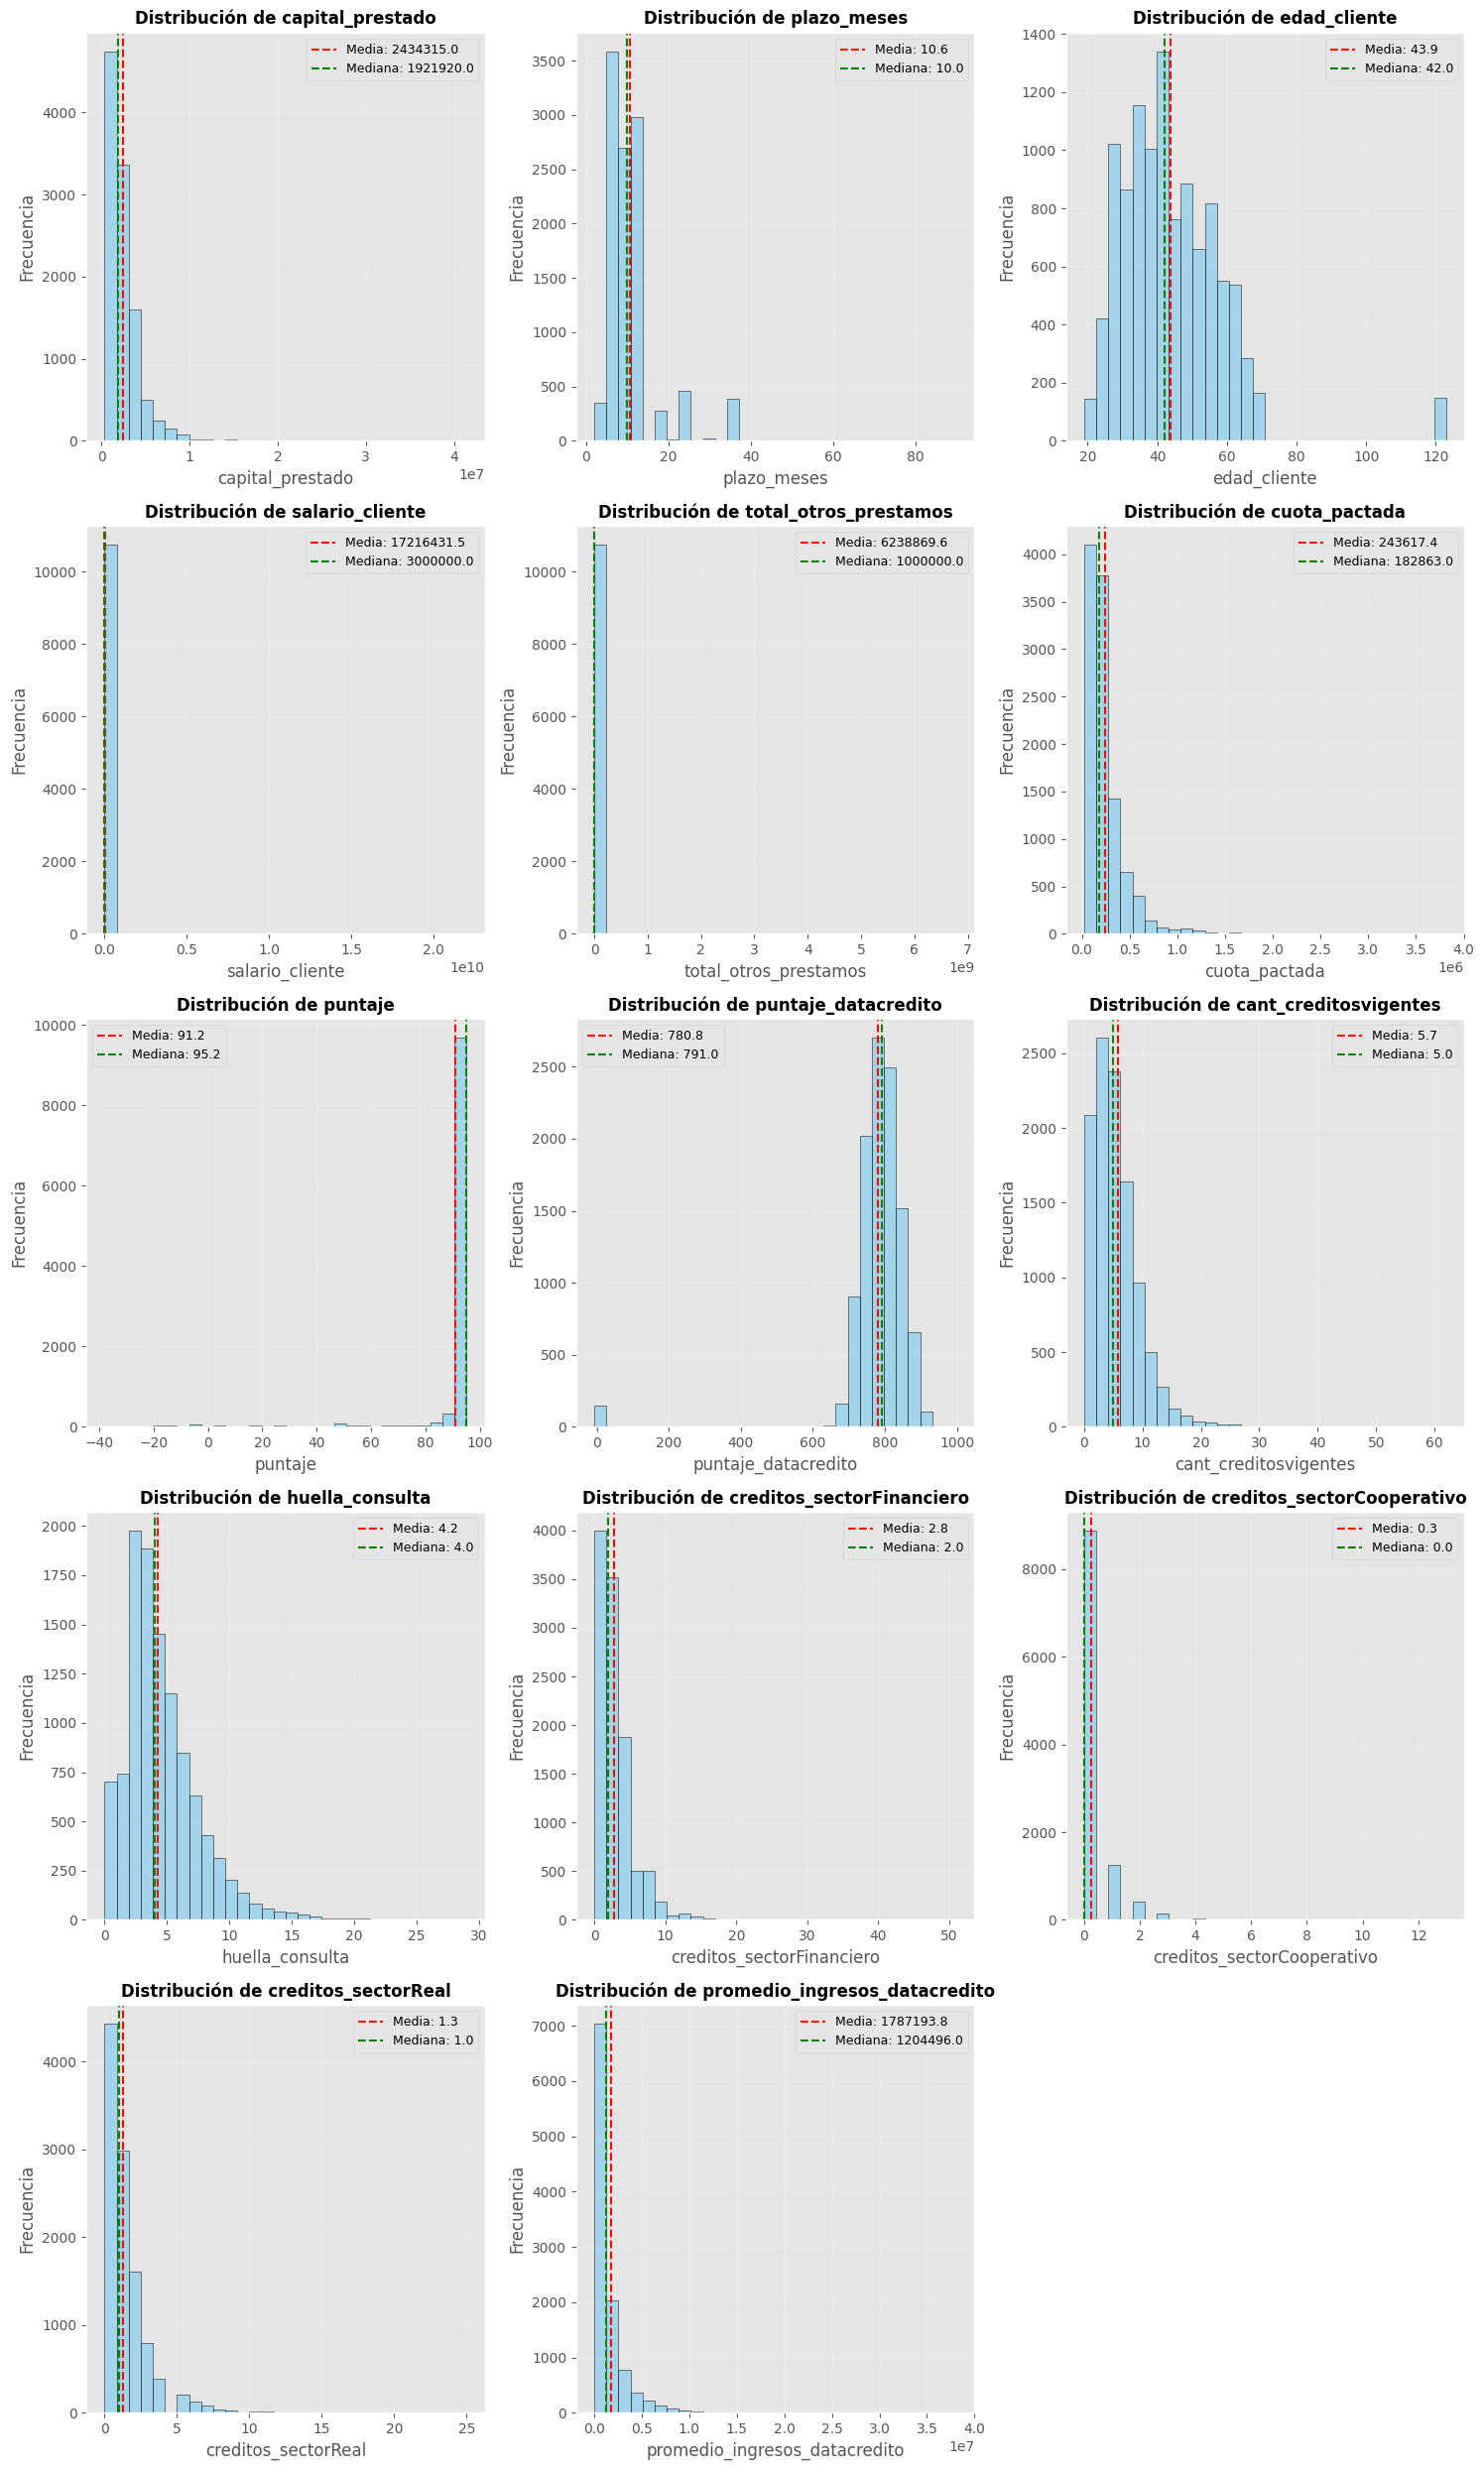


2. BOXPLOTS PARA DETECCIÓN DE OUTLIERS


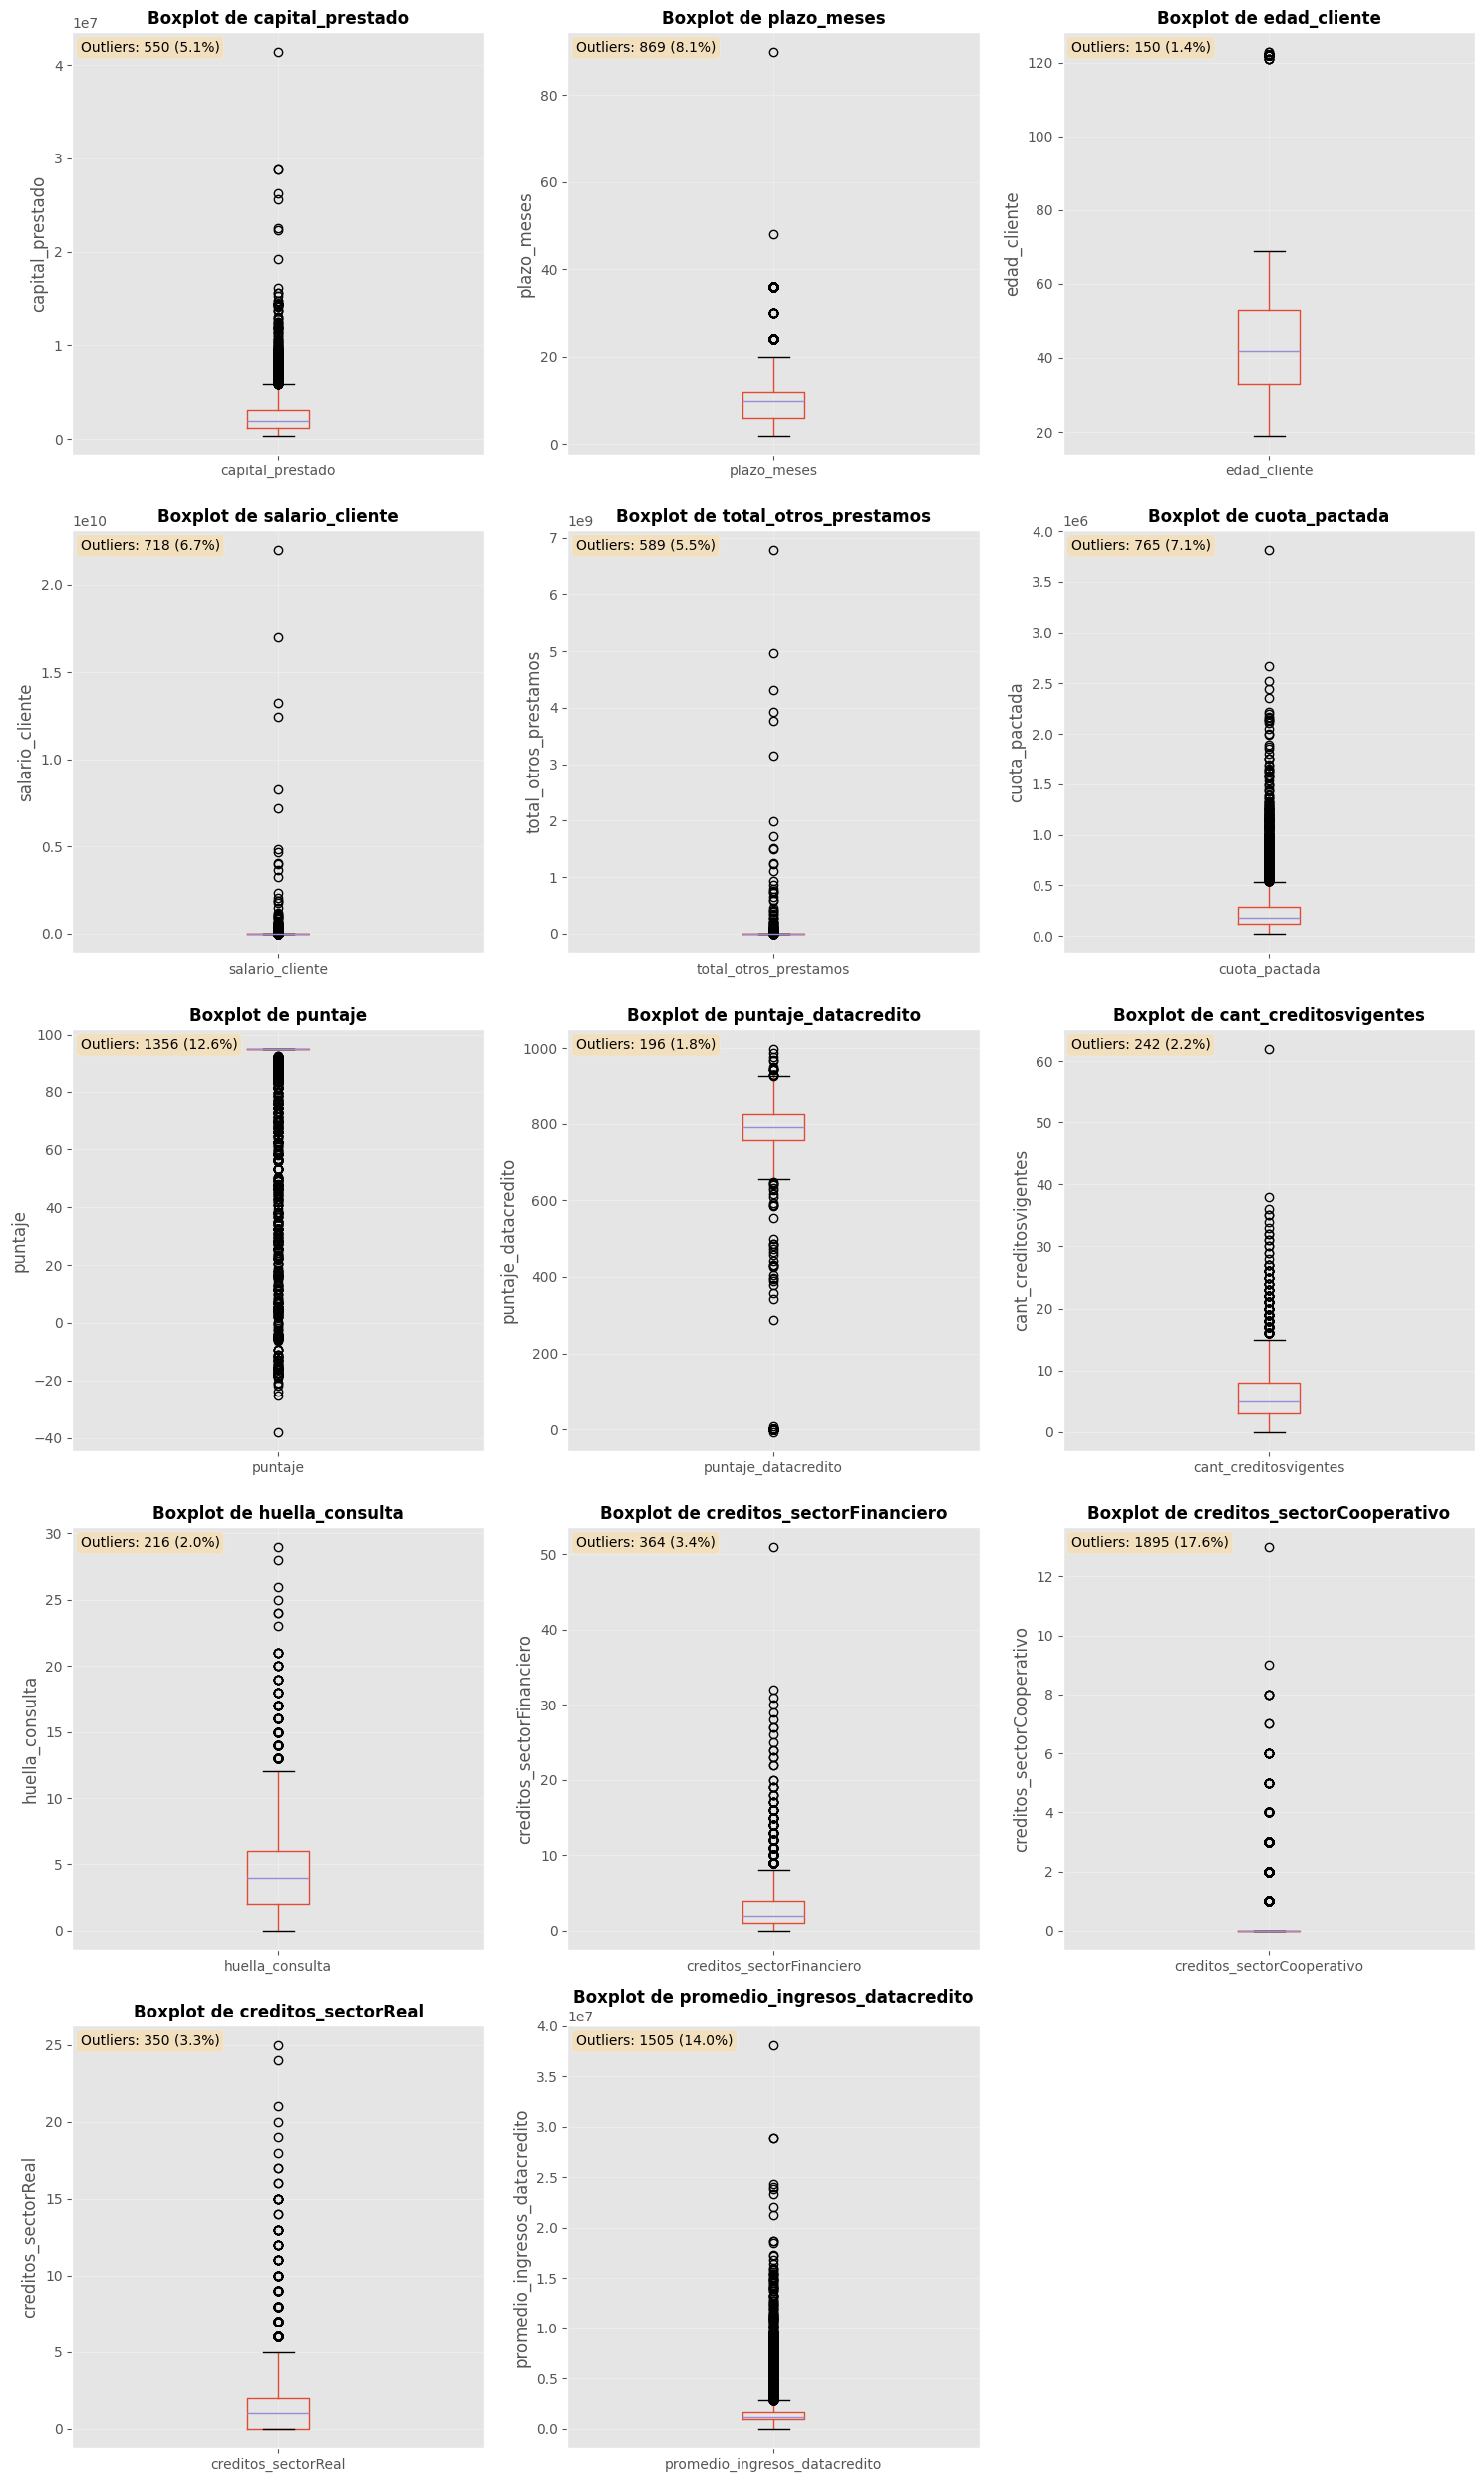

In [61]:
# Visualizaciones para Variables Numéricas
print("=== VISUALIZACIONES VARIABLES NUMÉRICAS ===")

# Importar scipy para análisis estadísticos
from scipy import stats

# 1. Histogramas de distribución para variables numéricas
print("\n1. HISTOGRAMAS DE DISTRIBUCIÓN")

# Calcular número de filas y columnas para subplots
n_numeric = len(numeric_vars)
n_cols = 3
n_rows = (n_numeric + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    df_typed[var].hist(bins=30, ax=ax, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)
    
    # Agregar líneas de tendencia central
    mean_val = df_typed[var].mean()
    median_val = df_typed[var].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.1f}')
    ax.legend(fontsize=9)

# Ocultar subplots vacíos
for i in range(n_numeric, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 2. Boxplots para detectar outliers
print("\n2. BOXPLOTS PARA DETECCIÓN DE OUTLIERS")

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    df_typed.boxplot(column=var, ax=ax)
    ax.set_title(f'Boxplot de {var}', fontsize=12, fontweight='bold')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)
    
    # Calcular y mostrar estadísticas de outliers
    Q1 = df_typed[var].quantile(0.25)
    Q3 = df_typed[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_typed[(df_typed[var] < lower_bound) | (df_typed[var] > upper_bound)]
    
    ax.text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(df_typed)*100:.1f}%)', 
            transform=ax.transAxes, verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Ocultar subplots vacíos
for i in range(n_numeric, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [62]:
# 3. Tablas Pivote para Variables Numéricas vs Variable Objetivo
print("\n3. ANÁLISIS BIVARIADO: VARIABLES NUMÉRICAS VS PAGO_ATIEMPO")

# Crear rangos/categorías para las variables numéricas principales para análisis pivote
key_numeric_vars = ['edad_cliente', 'salario_cliente', 'capital_prestado', 'puntaje', 'puntaje_datacredito']

for var in key_numeric_vars:
    if var in df_typed.columns:
        print(f"\n--- Análisis de {var.upper()} por Pago a Tiempo ---")
        
        # Crear categorías basadas en cuartiles con manejo de errores
        try:
            # Intentar crear 4 cuartiles
            df_typed[f'{var}_categoria'] = pd.qcut(df_typed[var], 
                                                   q=4, 
                                                   labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'],
                                                   duplicates='drop')
        except ValueError:
            # Si no se pueden crear 4 cuartiles, usar percentiles personalizados
            try:
                # Intentar con 3 categorías
                df_typed[f'{var}_categoria'] = pd.qcut(df_typed[var], 
                                                       q=3, 
                                                       labels=['Bajo', 'Medio', 'Alto'],
                                                       duplicates='drop')
            except ValueError:
                # Si aún falla, usar percentiles manuales
                q1 = df_typed[var].quantile(0.33)
                q2 = df_typed[var].quantile(0.67)
                
                df_typed[f'{var}_categoria'] = df_typed[var].apply(
                    lambda x: 'Bajo' if x <= q1 else ('Medio' if x <= q2 else 'Alto')
                )
        
        # Tabla pivote
        pivot_table = pd.crosstab(df_typed[f'{var}_categoria'], 
                                  df_typed['Pago_atiempo'], 
                                  normalize='index') * 100
        
        print("Porcentaje de pago a tiempo por categoría:")
        print(pivot_table.round(1))
        
        # Estadísticas por grupo
        group_stats = df_typed.groupby('Pago_atiempo')[var].agg(['mean', 'median', 'std']).round(2)
        print(f"\nEstadísticas de {var} por grupo:")
        print(group_stats)
        
        # Test estadístico (t-test)
        group_0 = df_typed[df_typed['Pago_atiempo'] == False][var].dropna()
        group_1 = df_typed[df_typed['Pago_atiempo'] == True][var].dropna()
        
        if len(group_0) > 0 and len(group_1) > 0:
            t_stat, p_value = stats.ttest_ind(group_0, group_1)
            print(f"T-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
            if p_value < 0.05:
                print("✅ Diferencia estadísticamente significativa")
            else:
                print("❌ No hay diferencia estadísticamente significativa")


3. ANÁLISIS BIVARIADO: VARIABLES NUMÉRICAS VS PAGO_ATIEMPO

--- Análisis de EDAD_CLIENTE por Pago a Tiempo ---
Porcentaje de pago a tiempo por categoría:
Pago_atiempo              0     1
edad_cliente_categoria           
Bajo                    7.1  92.9
Medio-Bajo              4.1  95.9
Medio-Alto              3.6  96.4
Alto                    4.1  95.9

Estadísticas de edad_cliente por grupo:
               mean  median    std
Pago_atiempo                      
0             41.77    38.0  17.06
1             44.06    42.0  14.95

--- Análisis de SALARIO_CLIENTE por Pago a Tiempo ---
Porcentaje de pago a tiempo por categoría:
Pago_atiempo                 0     1
salario_cliente_categoria           
Bajo                       5.0  95.0
Medio-Bajo                 4.3  95.7
Medio-Alto                 4.1  95.9
Alto                       5.5  94.5

Estadísticas de salario_cliente por grupo:
                     mean     median           std
Pago_atiempo                                 



4. MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS


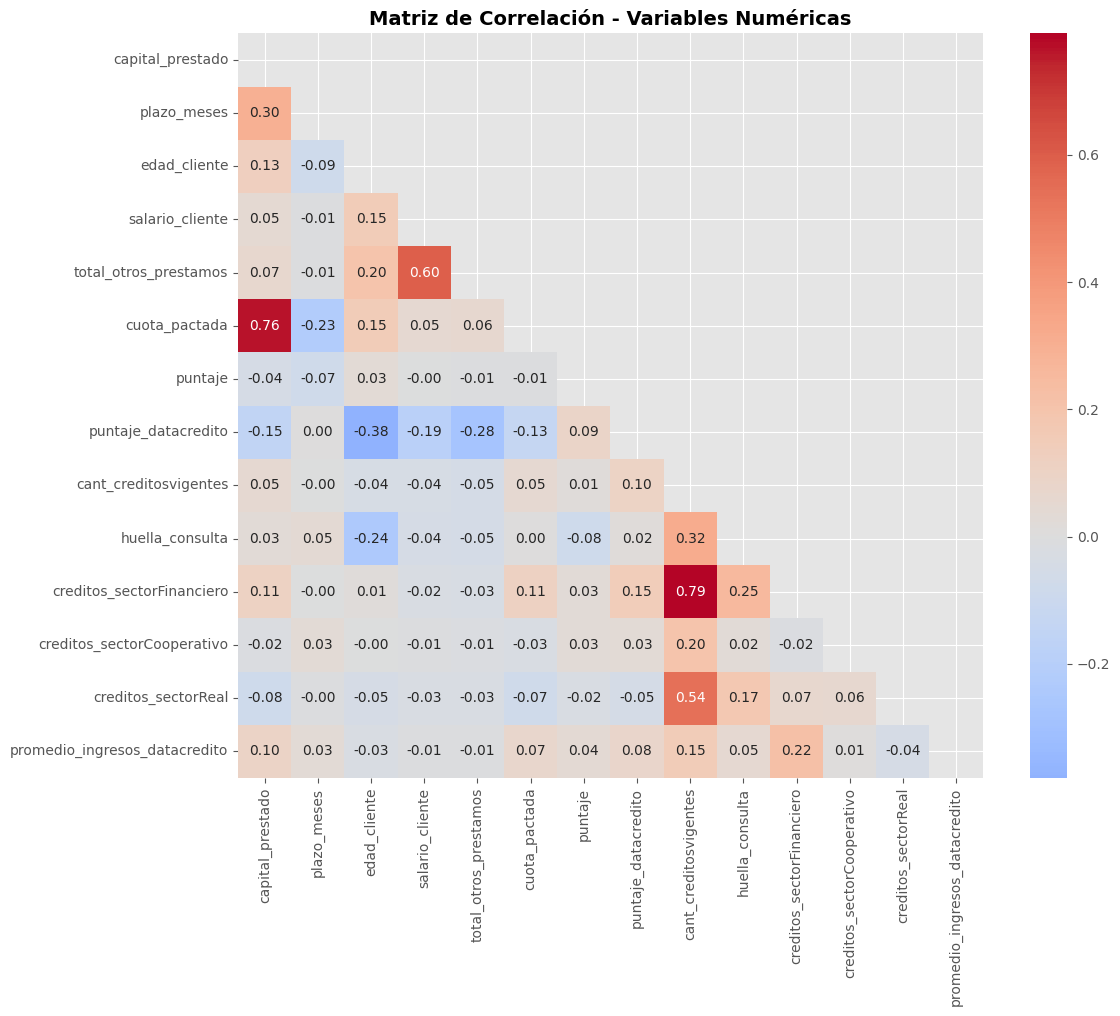


Correlaciones más fuertes (|r| > 0.5):
  cant_creditosvigentes ↔ creditos_sectorFinanciero: 0.791
  capital_prestado ↔ cuota_pactada: 0.764
  salario_cliente ↔ total_otros_prestamos: 0.597
  cant_creditosvigentes ↔ creditos_sectorReal: 0.541


In [63]:
# 4. Matriz de correlación
print("\n\n4. MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS")
print("="*60)

# Seleccionar solo variables numéricas para correlación
numeric_df = df_typed.select_dtypes(include=[np.number])

# Crear matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\nCorrelaciones más fuertes (|r| > 0.5):")
correlations_strong = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            correlations_strong.append((correlation_matrix.columns[i], 
                                       correlation_matrix.columns[j], 
                                       corr_value))

for var1, var2, corr in sorted(correlations_strong, key=lambda x: abs(x[2]), reverse=True):
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

if not correlations_strong:
    print("  No se encontraron correlaciones fuertes (|r| > 0.5)")

=== VISUALIZACIONES Y ANÁLISIS DE VARIABLES CATEGÓRICAS ===

1. COUNTPLOTS - DISTRIBUCIÓN DE FRECUENCIAS


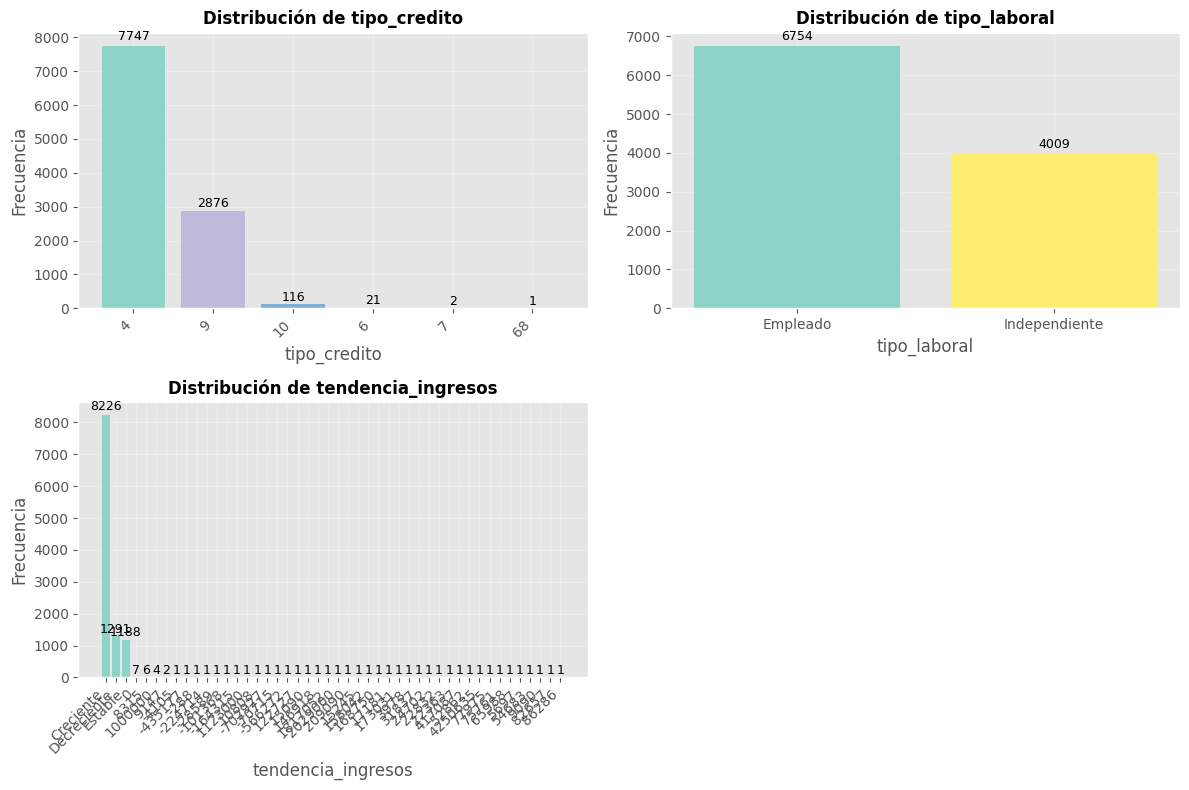


2. ANÁLISIS BIVARIADO: VARIABLES CATEGÓRICAS VS PAGO_ATIEMPO

--- TIPO_CREDITO vs PAGO_ATIEMPO ---
Tabla de contingencia (% por fila):
Pago_atiempo     0      1
tipo_credito             
4              4.7   95.3
6             42.9   57.1
7              0.0  100.0
9              4.7   95.3
10             2.6   97.4
68             0.0  100.0
Test Chi-cuadrado: χ² = 68.857, p-value = 0.000
✅ Existe asociación estadísticamente significativa
Cramér's V: 0.080 (0=sin asociación, 1=asociación perfecta)

--- TIPO_LABORAL vs PAGO_ATIEMPO ---
Tabla de contingencia (% por fila):
Pago_atiempo     0     1
tipo_laboral            
Empleado       4.3  95.7
Independiente  5.5  94.5
Test Chi-cuadrado: χ² = 7.997, p-value = 0.005
✅ Existe asociación estadísticamente significativa
Cramér's V: 0.027 (0=sin asociación, 1=asociación perfecta)

--- TENDENCIA_INGRESOS vs PAGO_ATIEMPO ---
Tabla de contingencia (% por fila):
Pago_atiempo          0      1
tendencia_ingresos            
-101368             0.0

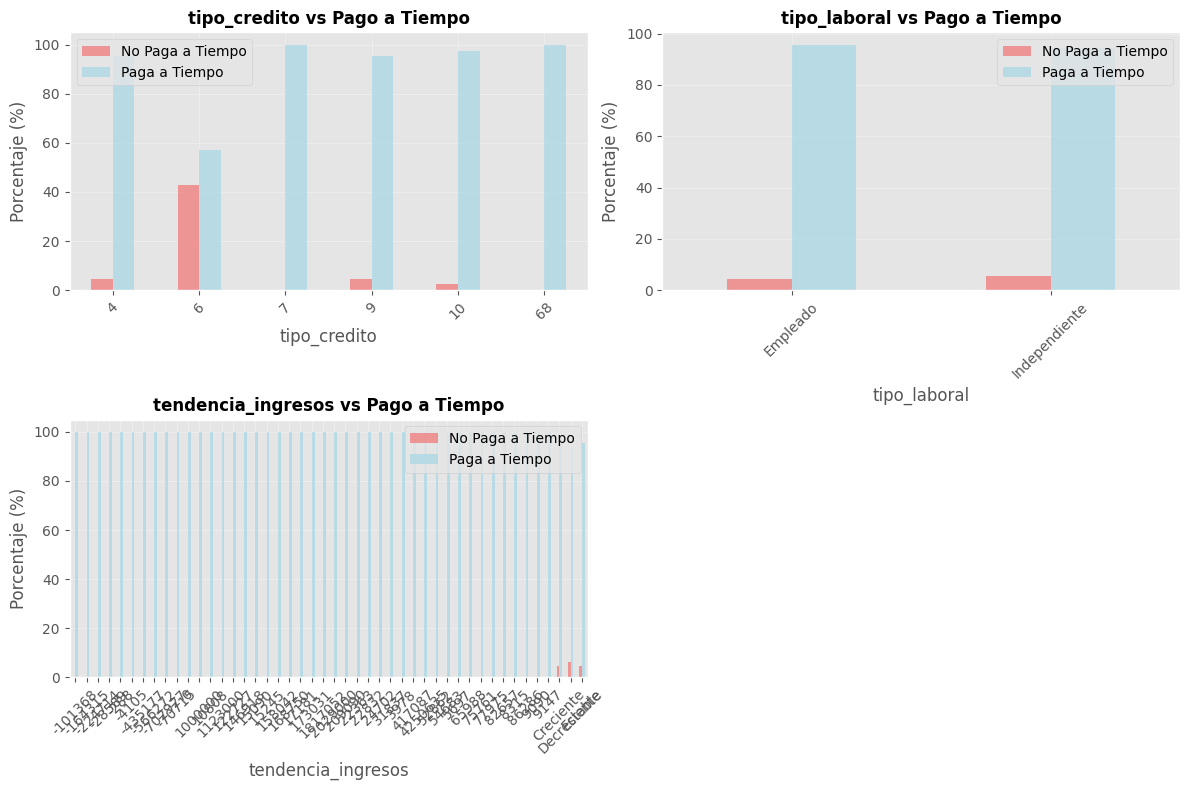


3. TABLAS DE FRECUENCIA DETALLADAS

--- TIPO_CREDITO ---
              Frecuencia  Porcentaje  Porcentaje_Acumulado
tipo_credito                                              
4                   7747       71.98                 71.98
9                   2876       26.72                 98.70
10                   116        1.08                 99.78
6                     21        0.20                 99.97
7                      2        0.02                 99.99
68                     1        0.01                100.00
Índice de diversidad: 0.364 (0=no diversidad, 1=máxima diversidad)
Entropía: 0.942 bits

--- TIPO_LABORAL ---
               Frecuencia  Porcentaje  Porcentaje_Acumulado
tipo_laboral                                               
Empleado             6754       62.75                 62.75
Independiente        4009       37.25                100.00
Índice de diversidad: 0.953 (0=no diversidad, 1=máxima diversidad)
Entropía: 0.953 bits

--- TENDENCIA_INGRESOS ---
    

In [64]:
# Análisis de Variables Categóricas
print("=== VISUALIZACIONES Y ANÁLISIS DE VARIABLES CATEGÓRICAS ===")

# 1. Countplots para variables categóricas
print("\n1. COUNTPLOTS - DISTRIBUCIÓN DE FRECUENCIAS")

if len(categorical_vars) > 0:
    n_cat = len(categorical_vars)
    n_cols_cat = 2
    n_rows_cat = (n_cat + n_cols_cat - 1) // n_cols_cat
    
    fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(12, 4*n_rows_cat))
    if n_rows_cat == 1:
        axes = [axes] if n_cols_cat == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(categorical_vars):
        ax = axes[i]
        
        # Countplot
        value_counts = df_typed[var].value_counts()
        colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
        
        bars = ax.bar(range(len(value_counts)), value_counts.values, color=colors)
        ax.set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Frecuencia')
        
        # Rotar etiquetas si son muchas categorías
        labels = [str(x) for x in value_counts.index]
        if len(labels) > 3:
            ax.set_xticks(range(len(labels)))
            ax.set_xticklabels(labels, rotation=45, ha='right')
        else:
            ax.set_xticks(range(len(labels)))
            ax.set_xticklabels(labels)
        
        # Agregar valores encima de las barras
        for bar, count in zip(bars, value_counts.values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count}', ha='center', va='bottom', fontsize=9)
        
        ax.grid(True, alpha=0.3)
    
    # Ocultar subplots vacíos
    for i in range(n_cat, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    # 2. Análisis bivariado: Variables categóricas vs Pago_atiempo
    print("\n2. ANÁLISIS BIVARIADO: VARIABLES CATEGÓRICAS VS PAGO_ATIEMPO")
    
    fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(12, 4*n_rows_cat))
    if n_rows_cat == 1:
        axes = [axes] if n_cols_cat == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(categorical_vars):
        ax = axes[i]
        
        # Crear tabla pivote
        pivot_table = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'], normalize='index') * 100
        
        print(f"\n--- {var.upper()} vs PAGO_ATIEMPO ---")
        print("Tabla de contingencia (% por fila):")
        print(pivot_table.round(1))
        
        # Gráfico de barras apiladas
        pivot_table.plot(kind='bar', ax=ax, stacked=False, 
                        color=['lightcoral', 'lightblue'], alpha=0.8)
        ax.set_title(f'{var} vs Pago a Tiempo', fontsize=12, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Porcentaje (%)')
        ax.legend(['No Paga a Tiempo', 'Paga a Tiempo'])
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)
        
        # Test Chi-cuadrado para independencia
        contingency_table = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"Test Chi-cuadrado: χ² = {chi2:.3f}, p-value = {p_value:.3f}")
        if p_value < 0.05:
            print("✅ Existe asociación estadísticamente significativa")
        else:
            print("❌ No existe asociación estadísticamente significativa")
        
        # Calcular Cramér's V (medida de asociación)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        print(f"Cramér's V: {cramers_v:.3f} (0=sin asociación, 1=asociación perfecta)")
    
    # Ocultar subplots vacíos
    for i in range(n_cat, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    # 3. Tablas de frecuencia detalladas
    print("\n3. TABLAS DE FRECUENCIA DETALLADAS")
    print("="*50)
    
    for var in categorical_vars:
        print(f"\n--- {var.upper()} ---")
        
        # Tabla de frecuencias absolutas y relativas
        freq_table = pd.DataFrame({
            'Frecuencia': df_typed[var].value_counts(),
            'Porcentaje': df_typed[var].value_counts(normalize=True) * 100,
            'Porcentaje_Acumulado': df_typed[var].value_counts(normalize=True).cumsum() * 100
        }).round(2)
        
        print(freq_table)
        
        # Índice de diversidad (Entropía de Shannon)
        proportions = df_typed[var].value_counts(normalize=True)
        entropy = -np.sum(proportions * np.log2(proportions + 1e-10))  # +1e-10 para evitar log(0)
        max_entropy = np.log2(len(proportions))
        diversity_index = entropy / max_entropy if max_entropy > 0 else 0
        
        print(f"Índice de diversidad: {diversity_index:.3f} (0=no diversidad, 1=máxima diversidad)")
        print(f"Entropía: {entropy:.3f} bits")

else:
    print("No hay variables categóricas para analizar en el dataset procesado.")

# 4. Resumen del análisis univariable
print("\n\n=== RESUMEN DEL ANÁLISIS UNIVARIABLE ===")
print("="*60)

print(f"Dataset final:")
print(f"  - Dimensiones: {df_typed.shape}")
print(f"  - Variables numéricas: {len(numeric_vars)}")
print(f"  - Variables categóricas: {len(categorical_vars)}")
print(f"  - Variable objetivo: Pago_atiempo (boolean)")

print(f"\nCaracterísticas destacadas:")
print(f"  - Variables con mayor variabilidad: ", end="")
if len(numeric_vars) > 0:
    cv_values = [(var, (df_typed[var].std()/df_typed[var].mean())*100) 
                 for var in numeric_vars if df_typed[var].mean() != 0]
    if cv_values:
        max_cv_var = max(cv_values, key=lambda x: x[1])
        print(f"{max_cv_var[0]} (CV: {max_cv_var[1]:.1f}%)")
    else:
        print("N/A")
else:
    print("N/A")

if len(categorical_vars) > 0:
    print(f"  - Variable categórica más diversa: ", end="")
    diversities = []
    for var in categorical_vars:
        proportions = df_typed[var].value_counts(normalize=True)
        entropy = -np.sum(proportions * np.log2(proportions + 1e-10))
        max_entropy = np.log2(len(proportions))
        diversity = entropy / max_entropy if max_entropy > 0 else 0
        diversities.append((var, diversity))
    
    if diversities:
        max_div_var = max(diversities, key=lambda x: x[1])
        print(f"{max_div_var[0]} (Diversidad: {max_div_var[1]:.3f})")
    else:
        print("N/A")

print(f"  - Balance de la variable objetivo: ", end="")
target_balance = df_typed['Pago_atiempo'].value_counts(normalize=True).min()
print(f"{target_balance:.1%} (clase minoritaria)")

print("\n✅ Análisis univariable completado")

## 3.2 Análisis Bivariable
### Objetivo
Analizar la relación entre cada variable predictora y la variable objetivo (Pago_atiempo) mediante gráficos, tablas y pruebas estadísticas para identificar patrones y asociaciones relevantes que ayuden en la construcción del modelo predictivo.

=== ANÁLISIS BIVARIABLE: VARIABLES vs VARIABLE OBJETIVO ===
Analizando la relación entre cada variable y Pago_atiempo

1. VARIABLES NUMÉRICAS vs PAGO_ATIEMPO
Variables numéricas a analizar: 14
Variables: ['capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito']

1.A. DISTRIBUCIONES COMPARATIVAS
----------------------------------------


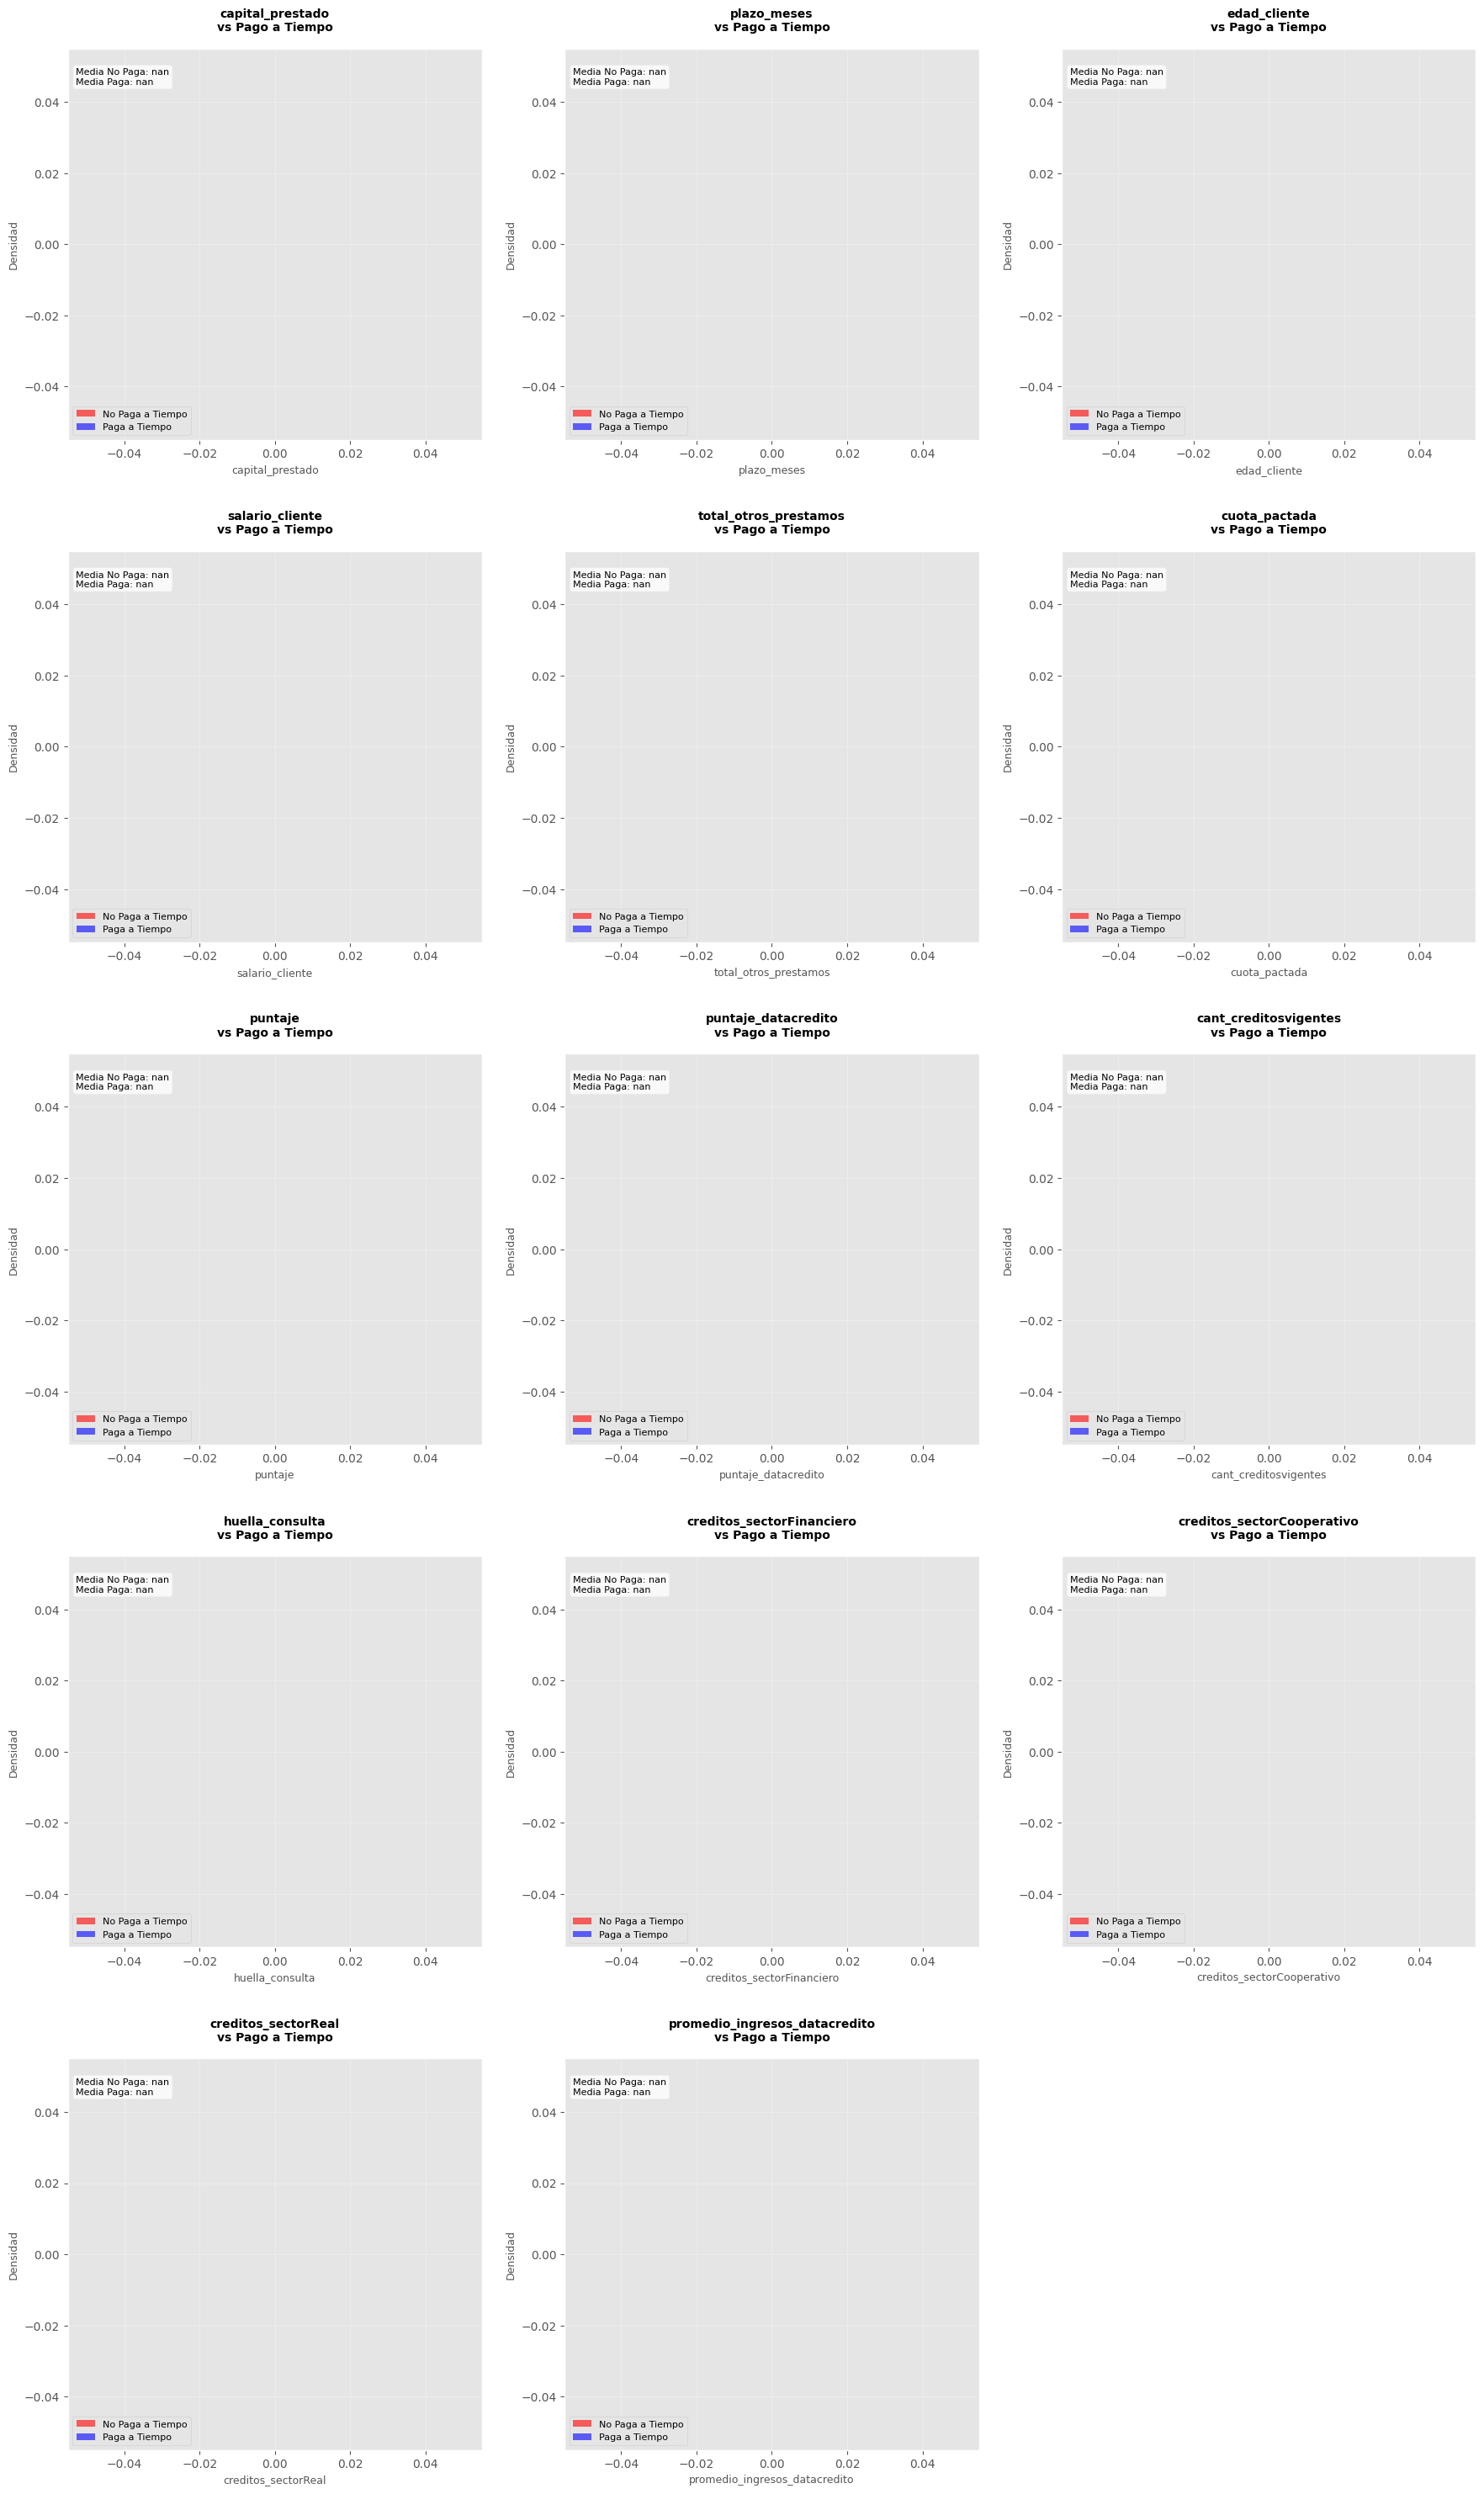


1.B. BOXPLOTS COMPARATIVOS
----------------------------------------


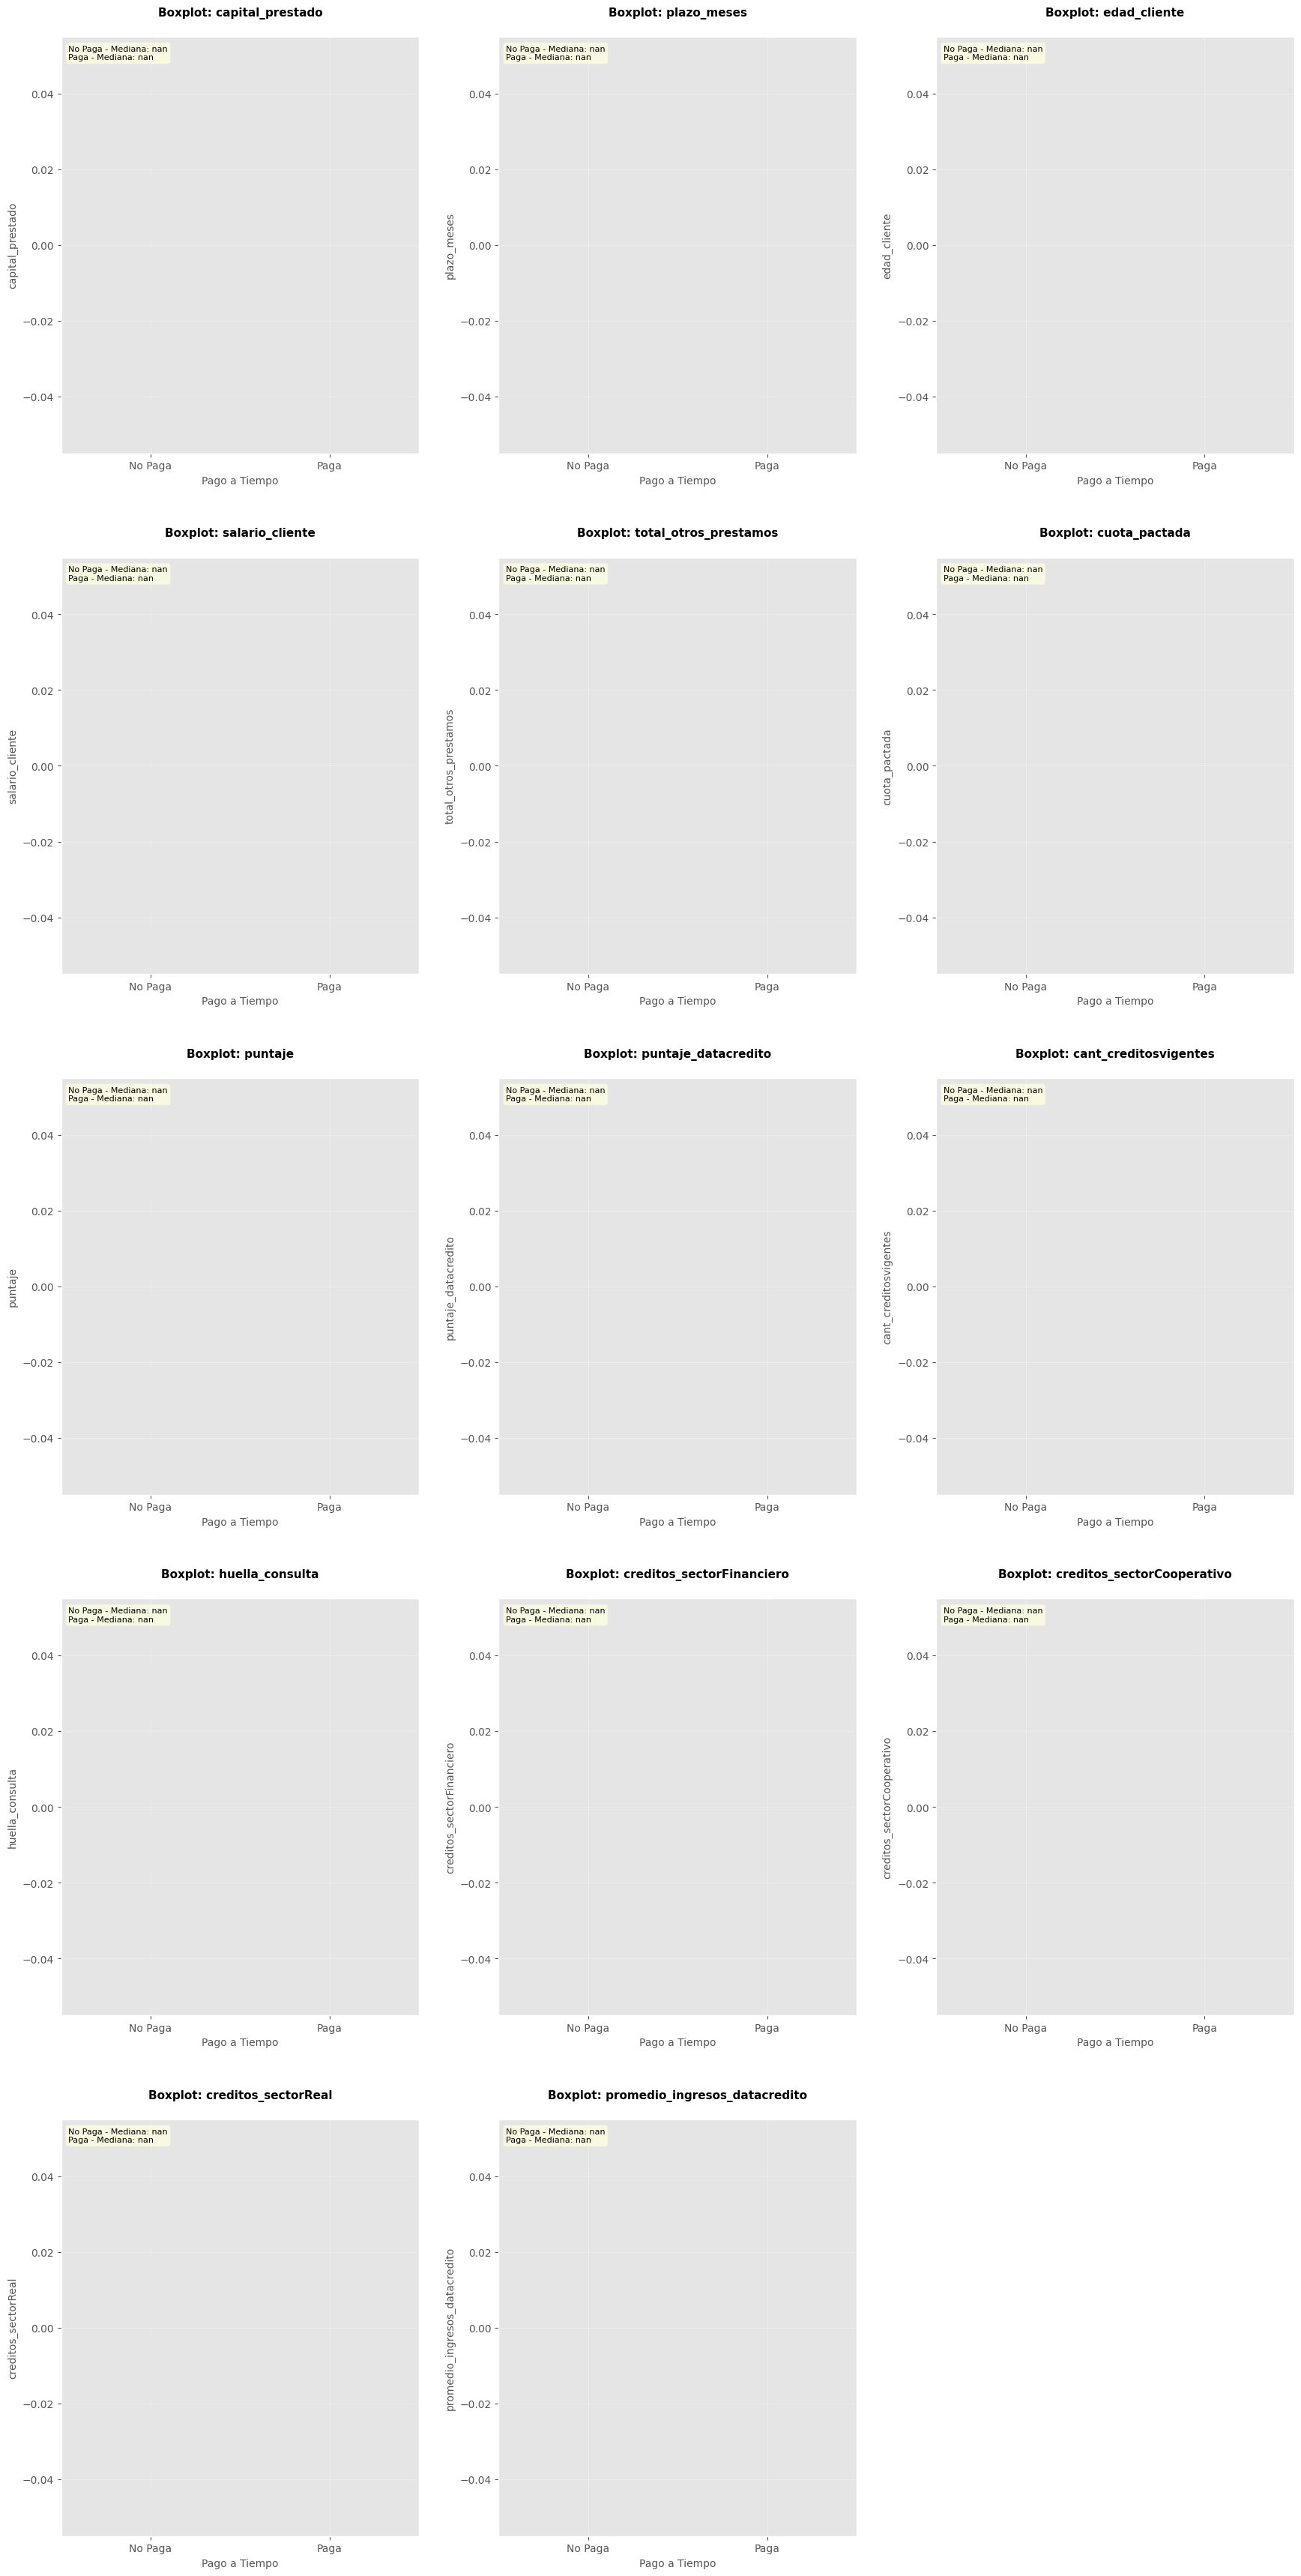


1.C. ESTADÍSTICAS RESUMIDAS
----------------------------------------

📊 VARIABLE: capital_prestado
------------------------------
Estadística     No Paga      Paga         Diferencia  
-------------------------------------------------------
Media           nan          nan          nan         
Mediana         nan          nan          nan         
Std Dev         nan          nan          nan         
Count           0            0            0           
T-test p-val    N/A          N/A          nan         
Significancia   N/A          N/A          NS          

📊 VARIABLE: plazo_meses
------------------------------
Estadística     No Paga      Paga         Diferencia  
-------------------------------------------------------
Media           nan          nan          nan         
Mediana         nan          nan          nan         
Std Dev         nan          nan          nan         
Count           0            0            0           
T-test p-val    N/A          N/A         

In [65]:
# ===================================================================
# 3.2 ANÁLISIS BIVARIABLE: RELACIÓN VARIABLES vs PAGO_ATIEMPO
# ===================================================================

print("=== ANÁLISIS BIVARIABLE: VARIABLES vs VARIABLE OBJETIVO ===")
print("Analizando la relación entre cada variable y Pago_atiempo")

# 1. ANÁLISIS BIVARIABLE PARA VARIABLES NUMÉRICAS
print("\n" + "="*60)
print("1. VARIABLES NUMÉRICAS vs PAGO_ATIEMPO")
print("="*60)

# Obtener variables numéricas (excluyendo la objetivo)
numeric_vars_analysis = [col for col in df_typed.select_dtypes(include=[np.number]).columns 
                        if col != 'Pago_atiempo']

print(f"Variables numéricas a analizar: {len(numeric_vars_analysis)}")
print(f"Variables: {numeric_vars_analysis}")

# A. Distribuciones comparativas con histogramas
print("\n1.A. DISTRIBUCIONES COMPARATIVAS")
print("-" * 40)

# Crear subplots para histogramas comparativos
n_vars = len(numeric_vars_analysis)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

# Aumentar el espacio entre subplots y ajustar el tamaño
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(numeric_vars_analysis):
    ax = axes[i]
    
    # Datos para cada grupo
    group_0 = df_typed[df_typed['Pago_atiempo'] == False][var].dropna()
    group_1 = df_typed[df_typed['Pago_atiempo'] == True][var].dropna()
    
    # Histogramas superpuestos
    ax.hist(group_0, bins=30, alpha=0.6, label='No Paga a Tiempo', color='red', density=True)
    ax.hist(group_1, bins=30, alpha=0.6, label='Paga a Tiempo', color='blue', density=True)
    
    # Título más compacto y con mejor espaciado
    ax.set_title(f'{var}\nvs Pago a Tiempo', fontweight='bold', fontsize=10, pad=15)
    ax.set_xlabel(var, fontsize=9)
    ax.set_ylabel('Densidad', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Agregar líneas de medias con etiquetas más compactas
    ax.axvline(group_0.mean(), color='red', linestyle='--', alpha=0.8)
    ax.axvline(group_1.mean(), color='blue', linestyle='--', alpha=0.8)
    
    # Añadir texto con las medias de forma más compacta
    ax.text(0.02, 0.95, f'Media No Paga: {group_0.mean():.1f}\nMedia Paga: {group_1.mean():.1f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ocultar subplots vacíos
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

# Ajustar espaciado entre subplots
plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=2.0)
plt.show()

# B. Boxplots comparativos
print("\n1.B. BOXPLOTS COMPARATIVOS")
print("-" * 40)

# Aumentar aún más el espacio para boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7*n_rows))
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(numeric_vars_analysis):
    ax = axes[i]
    
    # Crear DataFrame para boxplot
    group_0 = df_typed[df_typed['Pago_atiempo'] == False][var].dropna()
    group_1 = df_typed[df_typed['Pago_atiempo'] == True][var].dropna()
    
    data_for_plot = [group_0, group_1]
    
    # Crear boxplot con mejor configuración
    bp = ax.boxplot(data_for_plot, labels=['No Paga', 'Paga'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][1].set_facecolor('lightblue')
    
    # Título más compacto y con mejor espaciado
    ax.set_title(f'Boxplot: {var}', fontweight='bold', fontsize=11, pad=20)
    ax.set_ylabel(var, fontsize=10)
    ax.set_xlabel('Pago a Tiempo', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Añadir estadísticas básicas como texto
    stats_text = f'No Paga - Mediana: {group_0.median():.1f}\nPaga - Mediana: {group_1.median():.1f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Ocultar subplots vacíos
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

# Ajustar espaciado entre subplots con más separación vertical
plt.tight_layout(pad=3.0, h_pad=4.0, w_pad=2.5)
plt.show()

# C. Estadísticas resumidas por variable
print("\n1.C. ESTADÍSTICAS RESUMIDAS")
print("-" * 40)

for var in numeric_vars_analysis:
    print(f"\n📊 VARIABLE: {var}")
    print("-" * 30)
    
    group_0 = df_typed[df_typed['Pago_atiempo'] == False][var].dropna()
    group_1 = df_typed[df_typed['Pago_atiempo'] == True][var].dropna()
    
    print(f"{'Estadística':<15} {'No Paga':<12} {'Paga':<12} {'Diferencia':<12}")
    print("-" * 55)
    print(f"{'Media':<15} {group_0.mean():<12.2f} {group_1.mean():<12.2f} {group_1.mean()-group_0.mean():<12.2f}")
    print(f"{'Mediana':<15} {group_0.median():<12.2f} {group_1.median():<12.2f} {group_1.median()-group_0.median():<12.2f}")
    print(f"{'Std Dev':<15} {group_0.std():<12.2f} {group_1.std():<12.2f} {group_1.std()-group_0.std():<12.2f}")
    print(f"{'Count':<15} {len(group_0):<12} {len(group_1):<12} {len(group_1)-len(group_0):<12}")
    
    # Prueba t de Student para diferencia de medias
    from scipy import stats
    try:
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
        print(f"{'T-test p-val':<15} {'N/A':<12} {'N/A':<12} {p_value:<12.4f}")
        significance = "" if p_value < 0.001 else "" if p_value < 0.01 else "" if p_value < 0.05 else "NS"
        print(f"{'Significancia':<15} {'N/A':<12} {'N/A':<12} {significance:<12}")
    except:
        print(f"{'T-test':<15} {'Error en cálculo':<25}")

print("\n" + "="*60)
print("LEYENDA: *** p<0.001, ** p<0.01, * p<0.05, NS = No Significativo")
print("="*60)



2. VARIABLES CATEGÓRICAS vs PAGO_ATIEMPO
Variables categóricas a analizar: 8
Variables: ['tipo_credito', 'tipo_laboral', 'tendencia_ingresos', 'edad_cliente_categoria', 'salario_cliente_categoria', 'capital_prestado_categoria', 'puntaje_categoria', 'puntaje_datacredito_categoria']

2.A. GRÁFICOS DE BARRAS AGRUPADAS
----------------------------------------


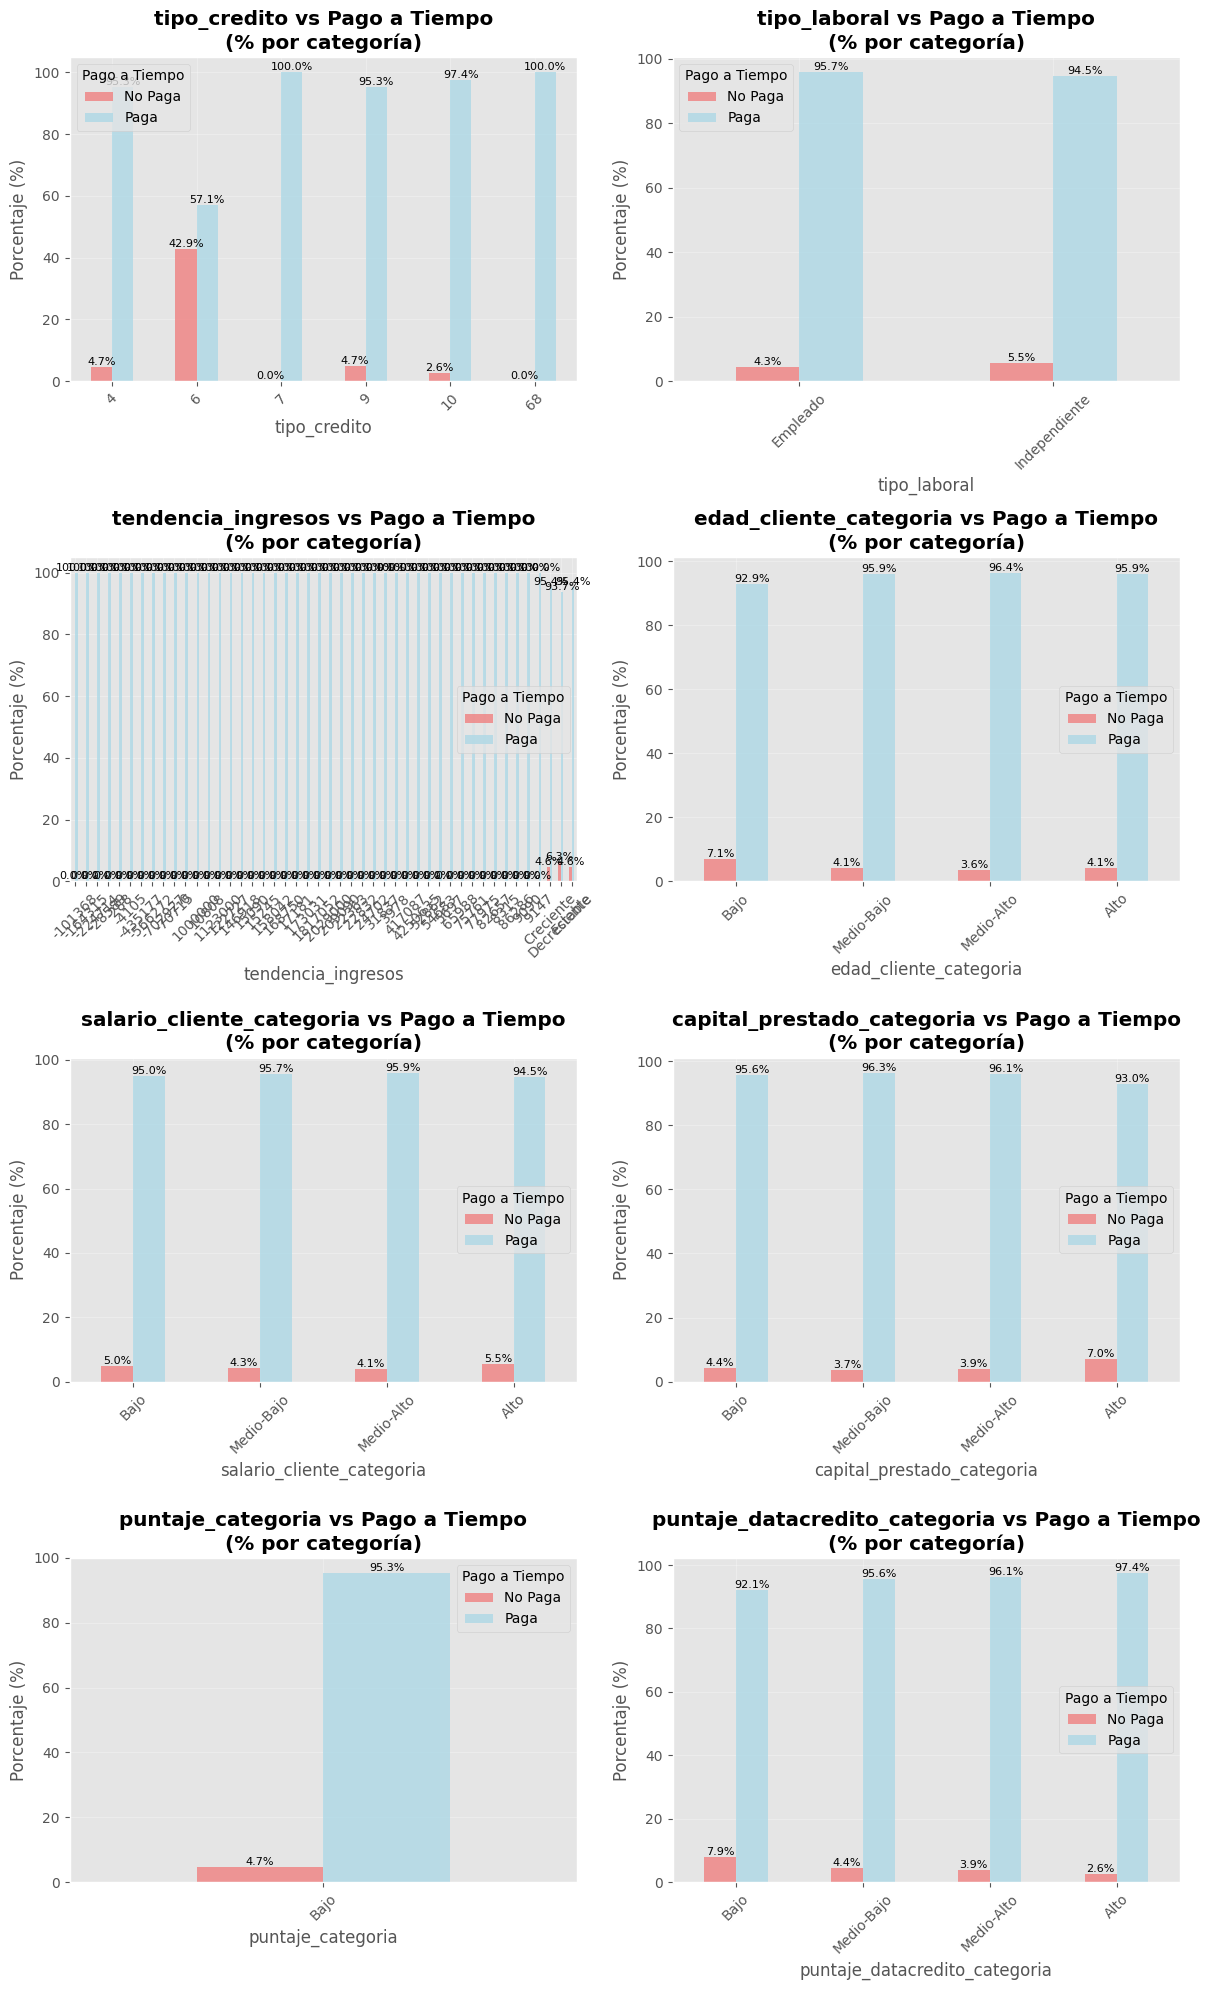


2.B. ANÁLISIS ESTADÍSTICO DETALLADO
----------------------------------------

--- TIPO_CREDITO ---
Tabla de Contingencia (frecuencias):
Pago_atiempo    0     1
tipo_credito           
4             363  7384
6               9    12
7               0     2
9             136  2740
10              3   113
68              0     1

Porcentajes por fila:
Pago_atiempo     0      1
tipo_credito             
4              4.7   95.3
6             42.9   57.1
7              0.0  100.0
9              4.7   95.3
10             2.6   97.4
68             0.0  100.0

Porcentajes por columna:
Pago_atiempo     0     1
tipo_credito            
4             71.0  72.0
6              1.8   0.1
7              0.0   0.0
9             26.6  26.7
10             0.6   1.1
68             0.0   0.0

Test Chi-cuadrado:
  χ² = 68.857
  p-valor = 0.000
  Grados de libertad = 5
  Cramér's V = 0.080
  Resultado: ***Altamente significativo***
  Fuerza de asociación: asociación débil

Residuos estandarizados (|resid

In [66]:
# 2. ANÁLISIS BIVARIABLE PARA VARIABLES CATEGÓRICAS
print("\n\n" + "="*60)
print("2. VARIABLES CATEGÓRICAS vs PAGO_ATIEMPO")
print("="*60)

# Obtener variables categóricas
categorical_vars_analysis = [col for col in df_typed.select_dtypes(include=['category', 'object']).columns 
                            if col != 'Pago_atiempo']

print(f"Variables categóricas a analizar: {len(categorical_vars_analysis)}")
print(f"Variables: {categorical_vars_analysis}")

if len(categorical_vars_analysis) > 0:
    # A. Gráficos de barras agrupadas
    print("\n2.A. GRÁFICOS DE BARRAS AGRUPADAS")
    print("-" * 40)
    
    n_cat_vars = len(categorical_vars_analysis)
    n_cols_cat = 2
    n_rows_cat = (n_cat_vars + n_cols_cat - 1) // n_cols_cat
    
    fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(12, 5*n_rows_cat))
    if n_rows_cat == 1:
        axes = [axes] if n_cols_cat == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(categorical_vars_analysis):
        ax = axes[i]
        
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'])
        
        # Calcular porcentajes
        percentages = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'], normalize='index') * 100
        
        # Gráfico de barras
        percentages.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue'], alpha=0.8)
        ax.set_title(f'{var} vs Pago a Tiempo\n(% por categoría)', fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Porcentaje (%)')
        ax.legend(['No Paga', 'Paga'], title='Pago a Tiempo')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)
        
        # Agregar valores en las barras
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', fontsize=8)
    
    # Ocultar subplots vacíos
    for i in range(n_cat_vars, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # B. Tablas de contingencia y análisis estadístico
    print("\n2.B. ANÁLISIS ESTADÍSTICO DETALLADO")
    print("-" * 40)
    
    for var in categorical_vars_analysis:
        print(f"\n--- {var.upper()} ---")
        
        # Tabla de contingencia
        contingency_table = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'])
        print("Tabla de Contingencia (frecuencias):")
        print(contingency_table)
        
        # Porcentajes por fila
        row_percentages = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'], normalize='index') * 100
        print("\nPorcentajes por fila:")
        print(row_percentages.round(1))
        
        # Porcentajes por columna
        col_percentages = pd.crosstab(df_typed[var], df_typed['Pago_atiempo'], normalize='columns') * 100
        print("\nPorcentajes por columna:")
        print(col_percentages.round(1))
        
        # Test Chi-cuadrado
        from scipy.stats import chi2_contingency
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        print(f"\nTest Chi-cuadrado:")
        print(f"  χ² = {chi2:.3f}")
        print(f"  p-valor = {p_value:.3f}")
        print(f"  Grados de libertad = {dof}")
        
        # Cramér's V (medida de asociación)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        print(f"  Cramér's V = {cramers_v:.3f}")
        
        # Interpretación
        if p_value < 0.001:
            significance = "***Altamente significativo***"
        elif p_value < 0.01:
            significance = "**Muy significativo**"
        elif p_value < 0.05:
            significance = "*Significativo*"
        else:
            significance = "No significativo"
        
        print(f"  Resultado: {significance}")
        
        # Interpretación de Cramér's V
        if cramers_v < 0.1:
            association = "asociación débil"
        elif cramers_v < 0.3:
            association = "asociación moderada"
        elif cramers_v < 0.5:
            association = "asociación fuerte"
        else:
            association = "asociación muy fuerte"
        
        print(f"  Fuerza de asociación: {association}")
        
        # Análisis de residuos estandarizados
        residuals = (contingency_table - expected) / np.sqrt(expected)
        print(f"\nResiduos estandarizados (|residuo| > 2 indica desviación significativa):")
        print(residuals.round(2))

else:
    print("No hay variables categóricas para analizar.")

=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (PAGO A TIEMPO) ===
Conteo absoluto:
Pago_atiempo
1    10252
0      511
Name: count, dtype: int64

Porcentaje:
Pago_atiempo
1    95.252253
0     4.747747
Name: proportion, dtype: float64


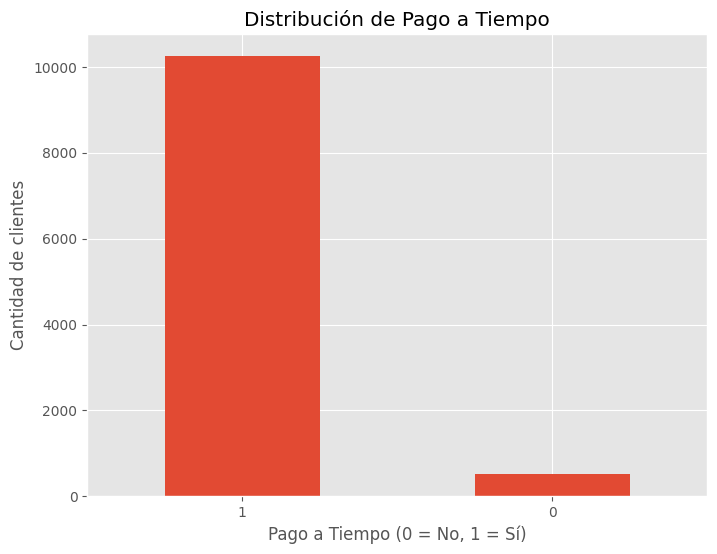


⚠️ ADVERTENCIA: Dataset desbalanceado detectado. Considerar técnicas de balanceo.


In [67]:
# Análisis de la variable objetivo
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (PAGO A TIEMPO) ===")
pago_atiempo_dist = df['Pago_atiempo'].value_counts()
pago_atiempo_pct = df['Pago_atiempo'].value_counts(normalize=True) * 100

print("Conteo absoluto:")
print(pago_atiempo_dist)
print("\nPorcentaje:")
print(pago_atiempo_pct)

# Visualización
plt.figure(figsize=(8, 6))
df['Pago_atiempo'].value_counts().plot(kind='bar')
plt.title('Distribución de Pago a Tiempo')
plt.xlabel('Pago a Tiempo (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

# Verificar si hay desbalance de clases
if pago_atiempo_pct.min() < 20:
    print("\n⚠️ ADVERTENCIA: Dataset desbalanceado detectado. Considerar técnicas de balanceo.")

## 4. Feature Engineering

En esta sección, se realizarán transformaciones en los datos para mejorar el rendimiento del modelo. Esto incluye la limpieza de datos, la creación de nuevas características y la selección de las más relevantes.

### 4.1 Limpieza de Datos

La limpieza de datos es el primer paso crucial en el feature engineering. Aquí se abordarán los valores faltantes, los valores atípicos y se eliminarán las columnas irrelevantes.

In [68]:
print("\nVerificación de valores nulos:")
print(df.isnull().sum())


Verificación de valores nulos:
tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64


#### 4.1.1 Tratamiento de Valores Faltantes

Como se identificó en el análisis exploratorio, las columnas `tendencia_ingresos` y `promedio_ingresos_datacredito` tienen valores faltantes.

*   **`promedio_ingresos_datacredito` (Numérica):** Se imputarán los valores faltantes utilizando la **mediana**. Se elige la mediana en lugar de la media porque es un estadístico más robusto y menos sensible a los valores atípicos, los cuales podrían estar presentes en los datos de ingresos.
*   **`tendencia_ingresos` (Categórica):** Se imputarán los valores faltantes utilizando la **moda** (el valor más frecuente). Esta es una estrategia estándar para variables categóricas, ya que asigna el valor más probable sin introducir categorías nuevas.

*   **`puntaje_datacredito` (Numérica):** Se imputarán los valores faltantes utilizando la **mediana**. Se elige la mediana en lugar de la media porque es un estadístico más robusto y menos sensible a los valores atípicos, los cuales podrían estar presentes en los datos de ingresos.        

In [69]:
# Imputar 'promedio_ingresos_datacredito' con la mediana
median_imput = df_clean['promedio_ingresos_datacredito'].median()
df_clean['promedio_ingresos_datacredito'].fillna(median_imput, inplace=True)
print(f"Valores faltantes en 'promedio_ingresos_datacredito' imputados con la mediana: {median_imput}")

# Análisis de categorías en 'tendencia_ingresos' antes de la limpieza
print(f"\n=== ANÁLISIS DE CATEGORÍAS EN 'tendencia_ingresos' ===")
print("Categorías y frecuencias antes de la limpieza:")
tendencia_counts = df_clean['tendencia_ingresos'].value_counts()
print(tendencia_counts)

# Identificar las 3 categorías principales (más frecuentes)
top_3_categories = tendencia_counts.head(3).index.tolist()
print(f"\nLas 3 categorías principales son: {top_3_categories}")

# Eliminar registros que no pertenecen a las 3 categorías principales
print(f"\nDimensiones antes de la limpieza: {df_clean.shape}")
df_clean = df_clean[df_clean['tendencia_ingresos'].isin(top_3_categories + [np.nan])]
print(f"Dimensiones después de eliminar categorías minoritarias: {df_clean.shape}")

# Mostrar categorías restantes
print(f"\nCategorías restantes en 'tendencia_ingresos':")
remaining_counts = df_clean['tendencia_ingresos'].value_counts()
print(remaining_counts)

# Imputar 'tendencia_ingresos' con la moda (ahora solo entre las 3 categorías principales)
mode_imput = df_clean['tendencia_ingresos'].mode()[0]
df_clean['tendencia_ingresos'].fillna(mode_imput, inplace=True)
print(f"\nValores faltantes en 'tendencia_ingresos' imputados con la moda: '{mode_imput}'")

# Verificar que no queden valores nulos y mostrar distribución final
print("\nVerificación de valores nulos después de la imputación:")
print(df_clean.isnull().sum())

print(f"\nDistribución final de 'tendencia_ingresos':")
final_distribution = df_clean['tendencia_ingresos'].value_counts()
final_percentages = df_clean['tendencia_ingresos'].value_counts(normalize=True) * 100
for category, count in final_distribution.items():
    percentage = final_percentages[category]
    print(f"  {category}: {count} registros ({percentage:.1f}%)")

Valores faltantes en 'promedio_ingresos_datacredito' imputados con la mediana: 1204496.0

=== ANÁLISIS DE CATEGORÍAS EN 'tendencia_ingresos' ===
Categorías y frecuencias antes de la limpieza:
tendencia_ingresos
Creciente      5294
Decreciente    1291
Estable        1188
0                 7
8315              6
1000000           4
9147              2
158042            1
168750            1
3978              1
-28589            1
-566272           1
24702             1
31837             1
122727            1
417087            1
9090              1
173031            1
-70715            1
-435177           1
-702927           1
-4105             1
54683             1
22832             1
209090            1
5697              1
10808             1
-288              1
-164315           1
2029000           1
17181             1
15245             1
82657             1
52862             1
1817052           1
75761             1
146918            1
1123000           1
15090             1
4250635  

#### 4.1.2 Corrección de Valores Atípicos (Outliers)

Los valores atípicos pueden distorsionar el entrenamiento de muchos modelos de machine learning. Se utilizará el método del **Rango Intercuartílico (IQR)** para identificar y corregir outliers en las columnas numéricas más relevantes.

El método consiste en:
1.  Calcular el primer cuartil (Q1) y el tercer cuartil (Q3).
2.  Calcular el IQR (IQR = Q3 - Q1).
3.  Definir los límites superior e inferior:
    *   Límite Superior = Q3 + 1.5 * IQR
    *   Límite Inferior = Q1 - 1.5 * IQR
4.  Cualquier valor fuera de estos límites se considera un outlier. En este caso, los outliers serán **acotados (capped)**, es decir, se reemplazarán por el límite correspondiente. Esto permite conservar la información de la fila en lugar de eliminarla.

In [70]:
# Seleccionar columnas numéricas para la corrección de outliers
numeric_cols_outliers = df_clean.select_dtypes(include=np.number).columns

for col in numeric_cols_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Contar outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"Se encontraron {len(outliers)} outliers en la columna '{col}'. Serán acotados.")
        # Acotar los outliers
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

print("\n✅ Proceso de corrección de outliers finalizado.")

# Visualizar una columna como ejemplo para ver el antes y después (opcional)
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# sns.boxplot(x=df_typed['salario_cliente'])
# plt.title('Antes de corregir outliers')
# plt.subplot(1, 2, 2)
# sns.boxplot(x=df_clean['salario_cliente'])
# plt.title('Después de corregir outliers')
# plt.show()

Se encontraron 1 outliers en la columna 'tipo_credito'. Serán acotados.
Se encontraron 548 outliers en la columna 'capital_prestado'. Serán acotados.
Se encontraron 861 outliers en la columna 'plazo_meses'. Serán acotados.
Se encontraron 150 outliers en la columna 'edad_cliente'. Serán acotados.
Se encontraron 719 outliers en la columna 'salario_cliente'. Serán acotados.
Se encontraron 584 outliers en la columna 'total_otros_prestamos'. Serán acotados.
Se encontraron 764 outliers en la columna 'cuota_pactada'. Serán acotados.
Se encontraron 1352 outliers en la columna 'puntaje'. Serán acotados.
Se encontraron 196 outliers en la columna 'puntaje_datacredito'. Serán acotados.
Se encontraron 238 outliers en la columna 'cant_creditosvigentes'. Serán acotados.
Se encontraron 212 outliers en la columna 'huella_consulta'. Serán acotados.
Se encontraron 355 outliers en la columna 'creditos_sectorFinanciero'. Serán acotados.
Se encontraron 1884 outliers en la columna 'creditos_sectorCooperativo

#### 4.1.3 Descartar Atributos Irrelevantes

Basado en el análisis exploratorio y el conocimiento del negocio, algunas columnas pueden no aportar información valiosa o ser redundantes.

*   **`fecha_prestamo`:** Esta columna de tipo fecha no puede ser utilizada directamente por la mayoría de los modelos. Aunque se podrían crear nuevas características a partir de ella (como el mes o el año), para este análisis inicial se considera que no es crítica y se eliminará para simplificar el modelo.
*   **Otras variables identificadas en el EDA:** En el paso anterior, se marcaron variables con baja varianza o alta correlación. Estas también serán eliminadas.

A continuación, se eliminan las columnas que se determinaron como irrelevantes en el paso `3.3. Identificación de Variables Irrelevantes`.

In [71]:
# Añadir 'fecha_prestamo' a la lista de variables a eliminar si no está ya
if 'fecha_prestamo' not in variables_a_eliminar:
    variables_a_eliminar.append('fecha_prestamo')

# Eliminar las columnas
df_clean.drop(columns=variables_a_eliminar, inplace=True, errors='ignore')

print("Se eliminaron las siguientes columnas:", variables_a_eliminar)
print("\nDimensiones del dataset después de la limpieza:", df_clean.shape)

print("\nInformación final del dataset limpio:")
df_clean.info()

Se eliminaron las siguientes columnas: ['fecha_prestamo', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor']

Dimensiones del dataset después de la limpieza: (10705, 18)

Información final del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 10705 entries, 0 to 10762
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo_credito                   10705 non-null  float64
 1   capital_prestado               10705 non-null  float64
 2   plazo_meses                    10705 non-null  float64
 3   edad_cliente                   10705 non-null  float64
 4   tipo_laboral                   10705 non-null  object 
 5   salario_cliente                10705 non-null  float64
 6   total_otros_prestamos          10705 non-null  float64
 7   cuota_pactada                  10705 non-null  float64
 8   puntaje                        10705 non-null  float64
 9   pu